In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.colors as mcolors
import matplotlib as mpl
import matplotlib.patches as mpatches
from matplotlib.colors import LogNorm, Normalize
from matplotlib.gridspec import GridSpec
import seaborn as sns

# Specifications

In [2]:
save = False
percentile_filter = True

perc_filter = 'no_percentile_filter'
if percentile_filter:
    perc_filter = 'percentile_filter'    

# Load Claims Data

In [3]:
# Load the combined Processed_Claims.csv file
processed_claims_file = perc_filter+"/final_filtered_claims.csv"
filtered_claims_df = pd.read_csv(processed_claims_file)

# Ensure that 'countyCode' is properly formatted as a 5-character string
filtered_claims_df['countyCode'] = filtered_claims_df['countyCode'].astype(int).astype(str)
filtered_claims_df['countyCode'] = filtered_claims_df['countyCode'].apply(lambda x: str(x).zfill(5))

/tmp/ipykernel_2439/3485391846.py:3: DtypeWarning: Columns (8,36,39,43,52,53,62) have mixed types. Specify dtype option on import or set low_memory=False.
  filtered_claims_df = pd.read_csv(processed_claims_file)


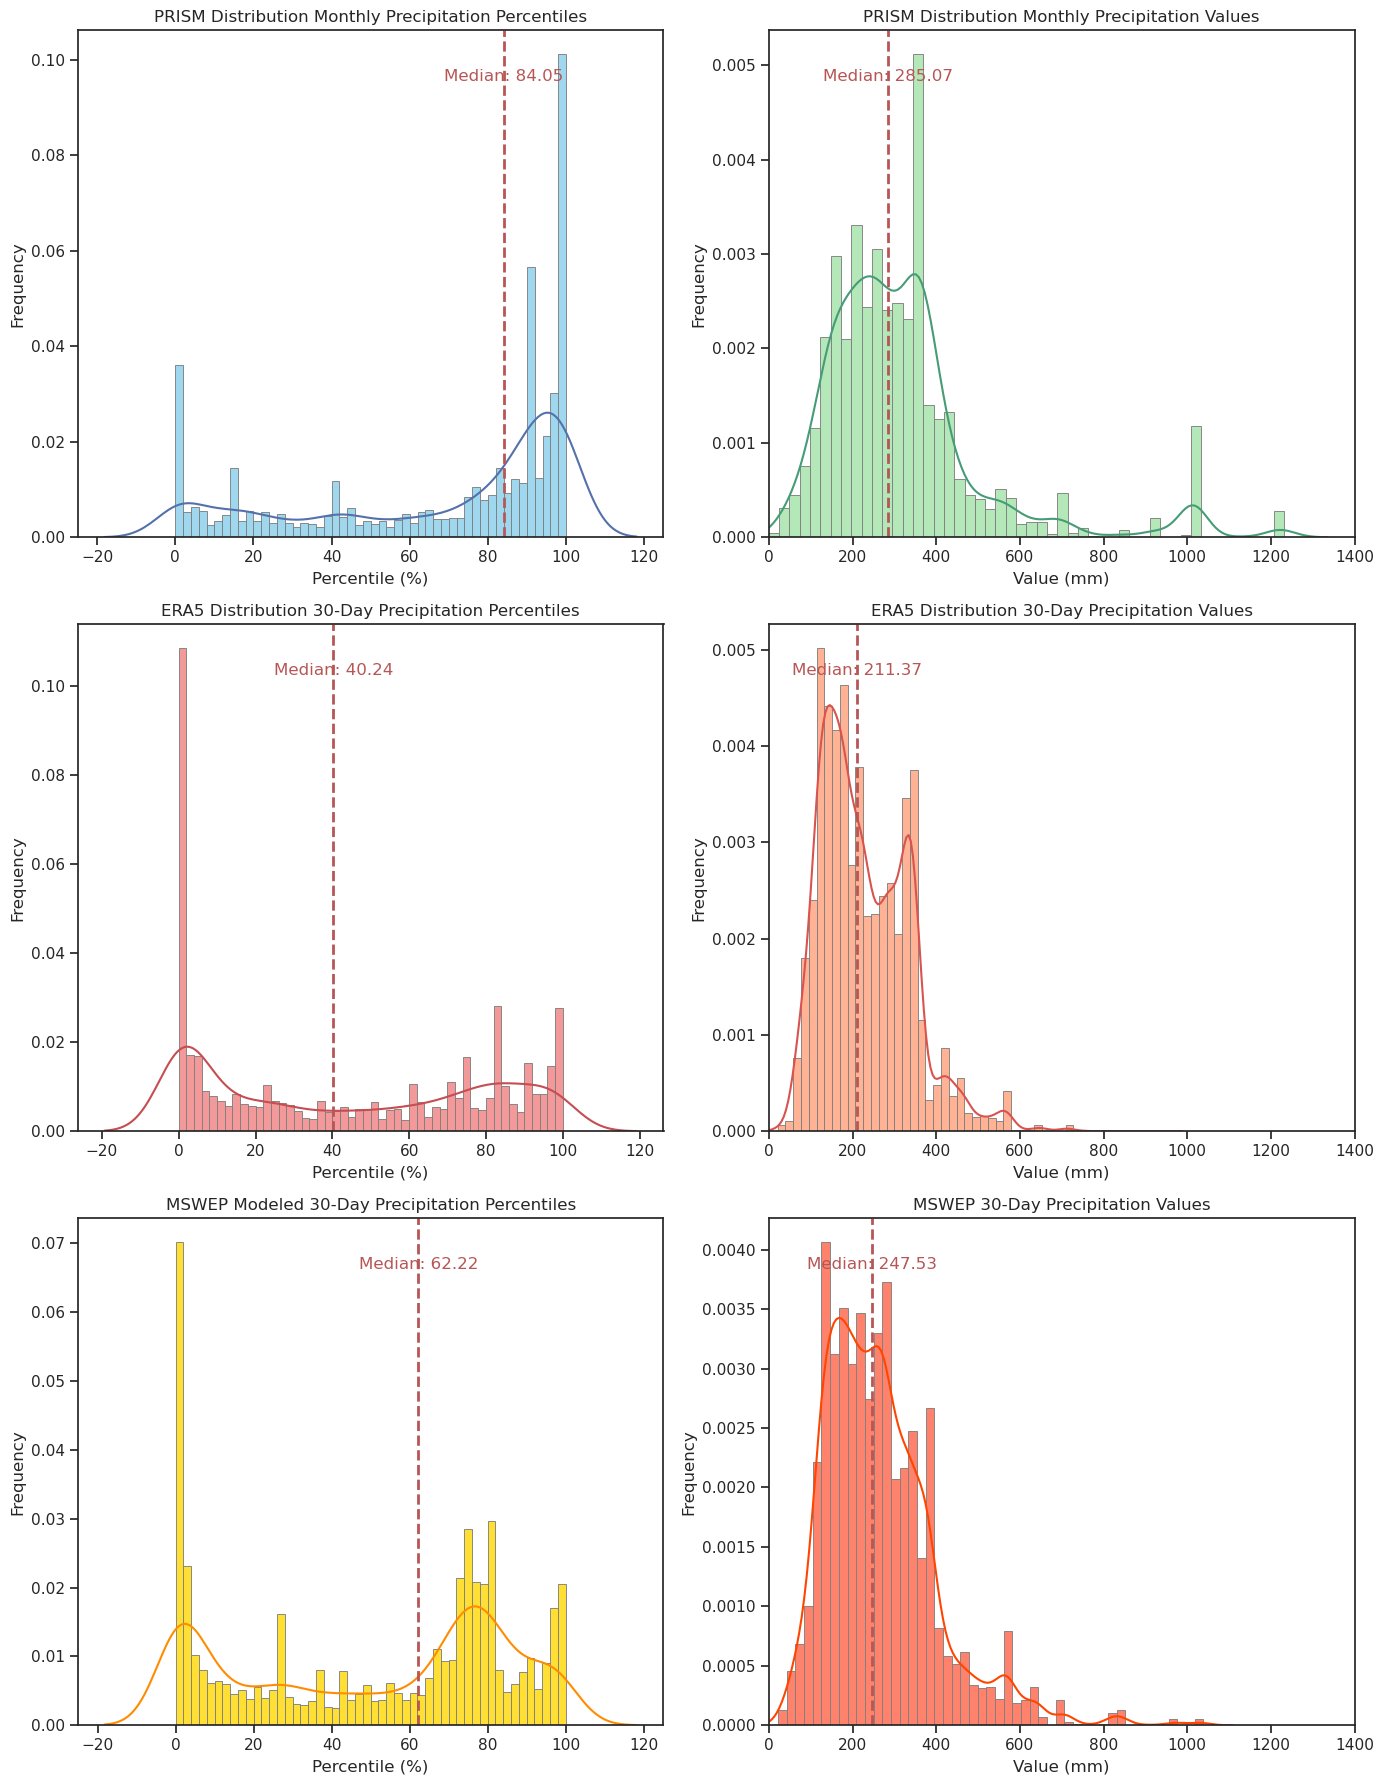

In [4]:
# Set the Seaborn style for aesthetics with ticks and deep color palette
sns.set(style="ticks", palette="deep")

# Create a figure with six subplots arranged in 3 rows and 2 columns
fig, axes = plt.subplots(3, 2, figsize=(14, 18))

# First row, first panel: PRISM Distribution of max_precip_3days_percentile
sns.histplot(
    filtered_claims_df['PRISM_mon_percentile'],
    bins=50,
    color='skyblue',
    edgecolor='grey',
    stat='density',
    alpha=0.8,
    ax=axes[0, 0],
)

sns.kdeplot(
    filtered_claims_df['PRISM_mon_percentile'],
    color='#5471AB',
    bw_adjust=3,  # Adjust for smoother KDE
    ax=axes[0, 0]
)

# Annotate the median value
median_max = filtered_claims_df['PRISM_mon_percentile'].median()
axes[0, 0].axvline(median_max, color='#B65655', linestyle='--', lw=2)
axes[0, 0].text(median_max + 0.01, axes[0, 0].get_ylim()[1] * 0.9, f'Median: {median_max:.2f}', color='#B65655', ha='center')
axes[0, 0].set_title('PRISM Distribution Monthly Precipitation Percentiles')
axes[0, 0].set_xlabel('Percentile (%)')
axes[0, 0].set_ylabel('Frequency')

# First row, second panel: PRISM Distribution of sum_precip_3days_percentile
sns.histplot(
    filtered_claims_df['PRISM_mon_precipitation'],
    bins=50,
    color='#A1E3A7',
    edgecolor='grey',
    stat='density',
    alpha=0.8,
    ax=axes[0, 1],
)

sns.kdeplot(
    filtered_claims_df['PRISM_mon_precipitation'],
    color='#469C76',
    bw_adjust=3,  # Adjust for smoother KDE
    ax=axes[0, 1]
)

# Annotate the median value
median_sum = filtered_claims_df['PRISM_mon_precipitation'].median()
axes[0, 1].axvline(median_sum, color='#B65655', linestyle='--', lw=2)
axes[0, 1].text(median_sum + 0.01, axes[0, 1].get_ylim()[1] * 0.9, f'Median: {median_sum:.2f}', color='#B65655', ha='center')
axes[0, 1].set_title('PRISM Distribution Monthly Precipitation Values')
axes[0, 1].set_xlim(0, 1400)
axes[0, 1].set_xlabel('Value (mm)')
axes[0, 1].set_ylabel('Frequency')

# Second row, first panel: ERA5 Distribution of precipitation_30d_sum_percentile
sns.histplot(
    filtered_claims_df['ERA5_precipitation_30d_sum_percentile_modeled'],
    bins=50,
    color='lightcoral',
    edgecolor='grey',
    stat='density',
    alpha=0.8,
    ax=axes[1, 0],
)

sns.kdeplot(
    filtered_claims_df['ERA5_precipitation_30d_sum_percentile_modeled'],
    color='#C44E52',
    bw_adjust=3,  # Adjust for smoother KDE
    ax=axes[1, 0]
)

# Annotate the median value
median_30d_percentile = filtered_claims_df['ERA5_precipitation_30d_sum_percentile_modeled'].median()
axes[1, 0].axvline(median_30d_percentile, color='#B65655', linestyle='--', lw=2)
axes[1, 0].text(median_30d_percentile + 0.01, axes[1, 0].get_ylim()[1] * 0.9, f'Median: {median_30d_percentile:.2f}', color='#B65655', ha='center')
axes[1, 0].set_title('ERA5 Distribution 30-Day Precipitation Percentiles')
axes[1, 0].set_xlabel('Percentile (%)')
axes[1, 0].set_ylabel('Frequency')

# Second row, second panel: ERA5 Distribution of precipitation_30d_sum
sns.histplot(
    filtered_claims_df['ERA5_precipitation_30d_sum'],
    bins=50,
    color='#FFA07A',
    edgecolor='grey',
    stat='density',
    alpha=0.8,
    ax=axes[1, 1],
)

sns.kdeplot(
    filtered_claims_df['ERA5_precipitation_30d_sum'],
    color='#D9534F',
    bw_adjust=3,  # Adjust for smoother KDE
    ax=axes[1, 1]
)

# Annotate the median value
median_30d_sum = filtered_claims_df['ERA5_precipitation_30d_sum'].median()
axes[1, 1].axvline(median_30d_sum, color='#B65655', linestyle='--', lw=2)
axes[1, 1].text(median_30d_sum + 0.01, axes[1, 1].get_ylim()[1] * 0.9, f'Median: {median_30d_sum:.2f}', color='#B65655', ha='center')
axes[1, 1].set_title('ERA5 Distribution 30-Day Precipitation Values')
axes[1, 1].set_xlabel('Value (mm)')
axes[1, 1].set_xlim(0, 1400)
axes[1, 1].set_ylabel('Frequency')

# Third row, first panel: MSWEP Distribution of precipitation_30d_sum_percentile_modeled
sns.histplot(
    filtered_claims_df['MSWEP_precipitation_30d_sum_percentile_modeled'],
    bins=50,
    color='#FFD700',
    edgecolor='grey',
    stat='density',
    alpha=0.8,
    ax=axes[2, 0],
)

sns.kdeplot(
    filtered_claims_df['MSWEP_precipitation_30d_sum_percentile_modeled'],
    color='#FF8C00',
    bw_adjust=3,  # Adjust for smoother KDE
    ax=axes[2, 0]
)

# Annotate the median value
median_mSWEP_percentile_modeled = filtered_claims_df['MSWEP_precipitation_30d_sum_percentile_modeled'].median()
axes[2, 0].axvline(median_mSWEP_percentile_modeled, color='#B65655', linestyle='--', lw=2)
axes[2, 0].text(median_mSWEP_percentile_modeled + 0.01, axes[2, 0].get_ylim()[1] * 0.9, f'Median: {median_mSWEP_percentile_modeled:.2f}', color='#B65655', ha='center')
axes[2, 0].set_title('MSWEP Modeled 30-Day Precipitation Percentiles')
axes[2, 0].set_xlabel('Percentile (%)')
axes[2, 0].set_ylabel('Frequency')

# Third row, second panel: MSWEP Distribution of precipitation_30d_sum
sns.histplot(
    filtered_claims_df['MSWEP_precipitation_30d_sum'],
    bins=50,
    color='#FF6347',
    edgecolor='grey',
    stat='density',
    alpha=0.8,
    ax=axes[2, 1],
)

sns.kdeplot(
    filtered_claims_df['MSWEP_precipitation_30d_sum'],
    color='#FF4500',
    bw_adjust=3,  # Adjust for smoother KDE
    ax=axes[2, 1]
)

# Annotate the median value
median_mSWEP_sum = filtered_claims_df['MSWEP_precipitation_30d_sum'].median()
axes[2, 1].axvline(median_mSWEP_sum, color='#B65655', linestyle='--', lw=2)
axes[2, 1].text(median_mSWEP_sum + 0.01, axes[2, 1].get_ylim()[1] * 0.9, f'Median: {median_mSWEP_sum:.2f}', color='#B65655', ha='center')
axes[2, 1].set_title('MSWEP 30-Day Precipitation Values')
axes[2, 1].set_xlabel('Value (mm)')
axes[2, 1].set_xlim(0, 1400)
axes[2, 1].set_ylabel('Frequency')

# Adjust layout to prevent overlap and improve spacing
plt.tight_layout()

# Show the plots
plt.show()

In [5]:
# Aggregate the means
aggregated_df = filtered_claims_df.groupby('countyCode').agg({
    'returnPeriod_PRISM': 'mean',
    'PRISM_mon_percentile': 'mean',
    'PRISM_mon_precipitation': 'mean',
    'ERA5_precipitation_30d_sum': 'mean',
    'ERA5_precipitation_30d_sum_percentile_modeled': 'mean',
    'returnPeriod_ERA5_30d': 'mean',
    'MSWEP_precipitation_30d_sum':'mean',
    'MSWEP_precipitation_30d_sum_percentile_modeled': 'mean',
    'returnPeriod_MSWEP_30d': 'mean',
}).reset_index()

# Load the county shapefile
county_shapefile_path = '../Local_Data/Geospatial/tl_2019_us_county.shp'
gdf_counties = gpd.read_file(county_shapefile_path)

# Load the shapefile for US states
state_shapefile_path = '../Local_Data/Geospatial/cb_2018_us_state_20m.shp'
gdf_states = gpd.read_file(state_shapefile_path)

# Merge the aggregated data with the county shapefile
gdf_counties = gdf_counties.merge(aggregated_df, left_on='GEOID', right_on='countyCode', how='left')

# Define the extent for the contiguous US (longitude and latitude bounds)
extent = [-130, -65, 24, 50]  # [min lon, max lon, min lat, max lat]

In [6]:
# Define two custom color palettes: 
# Left column: same red-blue color palette
colors_left = [
    '#e29578',  # Dark red for low values
    '#ffddd2',  # Light red
    '#edf6f9',  # Gray for values near 0
    '#83c5be',  # Light blue
    '#006d77'   # Dark blue for high values
]
cmap_left = mcolors.LinearSegmentedColormap.from_list('custom_cmap_left', colors_left, N=256)

# Right column: different red-blue color palette
colors_right = [
    '#d73027',  # Dark red
    '#fc8d59',  # Lighter red
    '#fee08b',  # Yellow near zero
    '#91bfdb',  # Light blue for mid-range
    '#4575b4'   # Dark blue for high values
]
cmap_right = mcolors.LinearSegmentedColormap.from_list('custom_cmap_right', colors_right, N=256)

# Define a color for counties with no data
no_data_color = '#a0a0a0'  # Light gray for no data

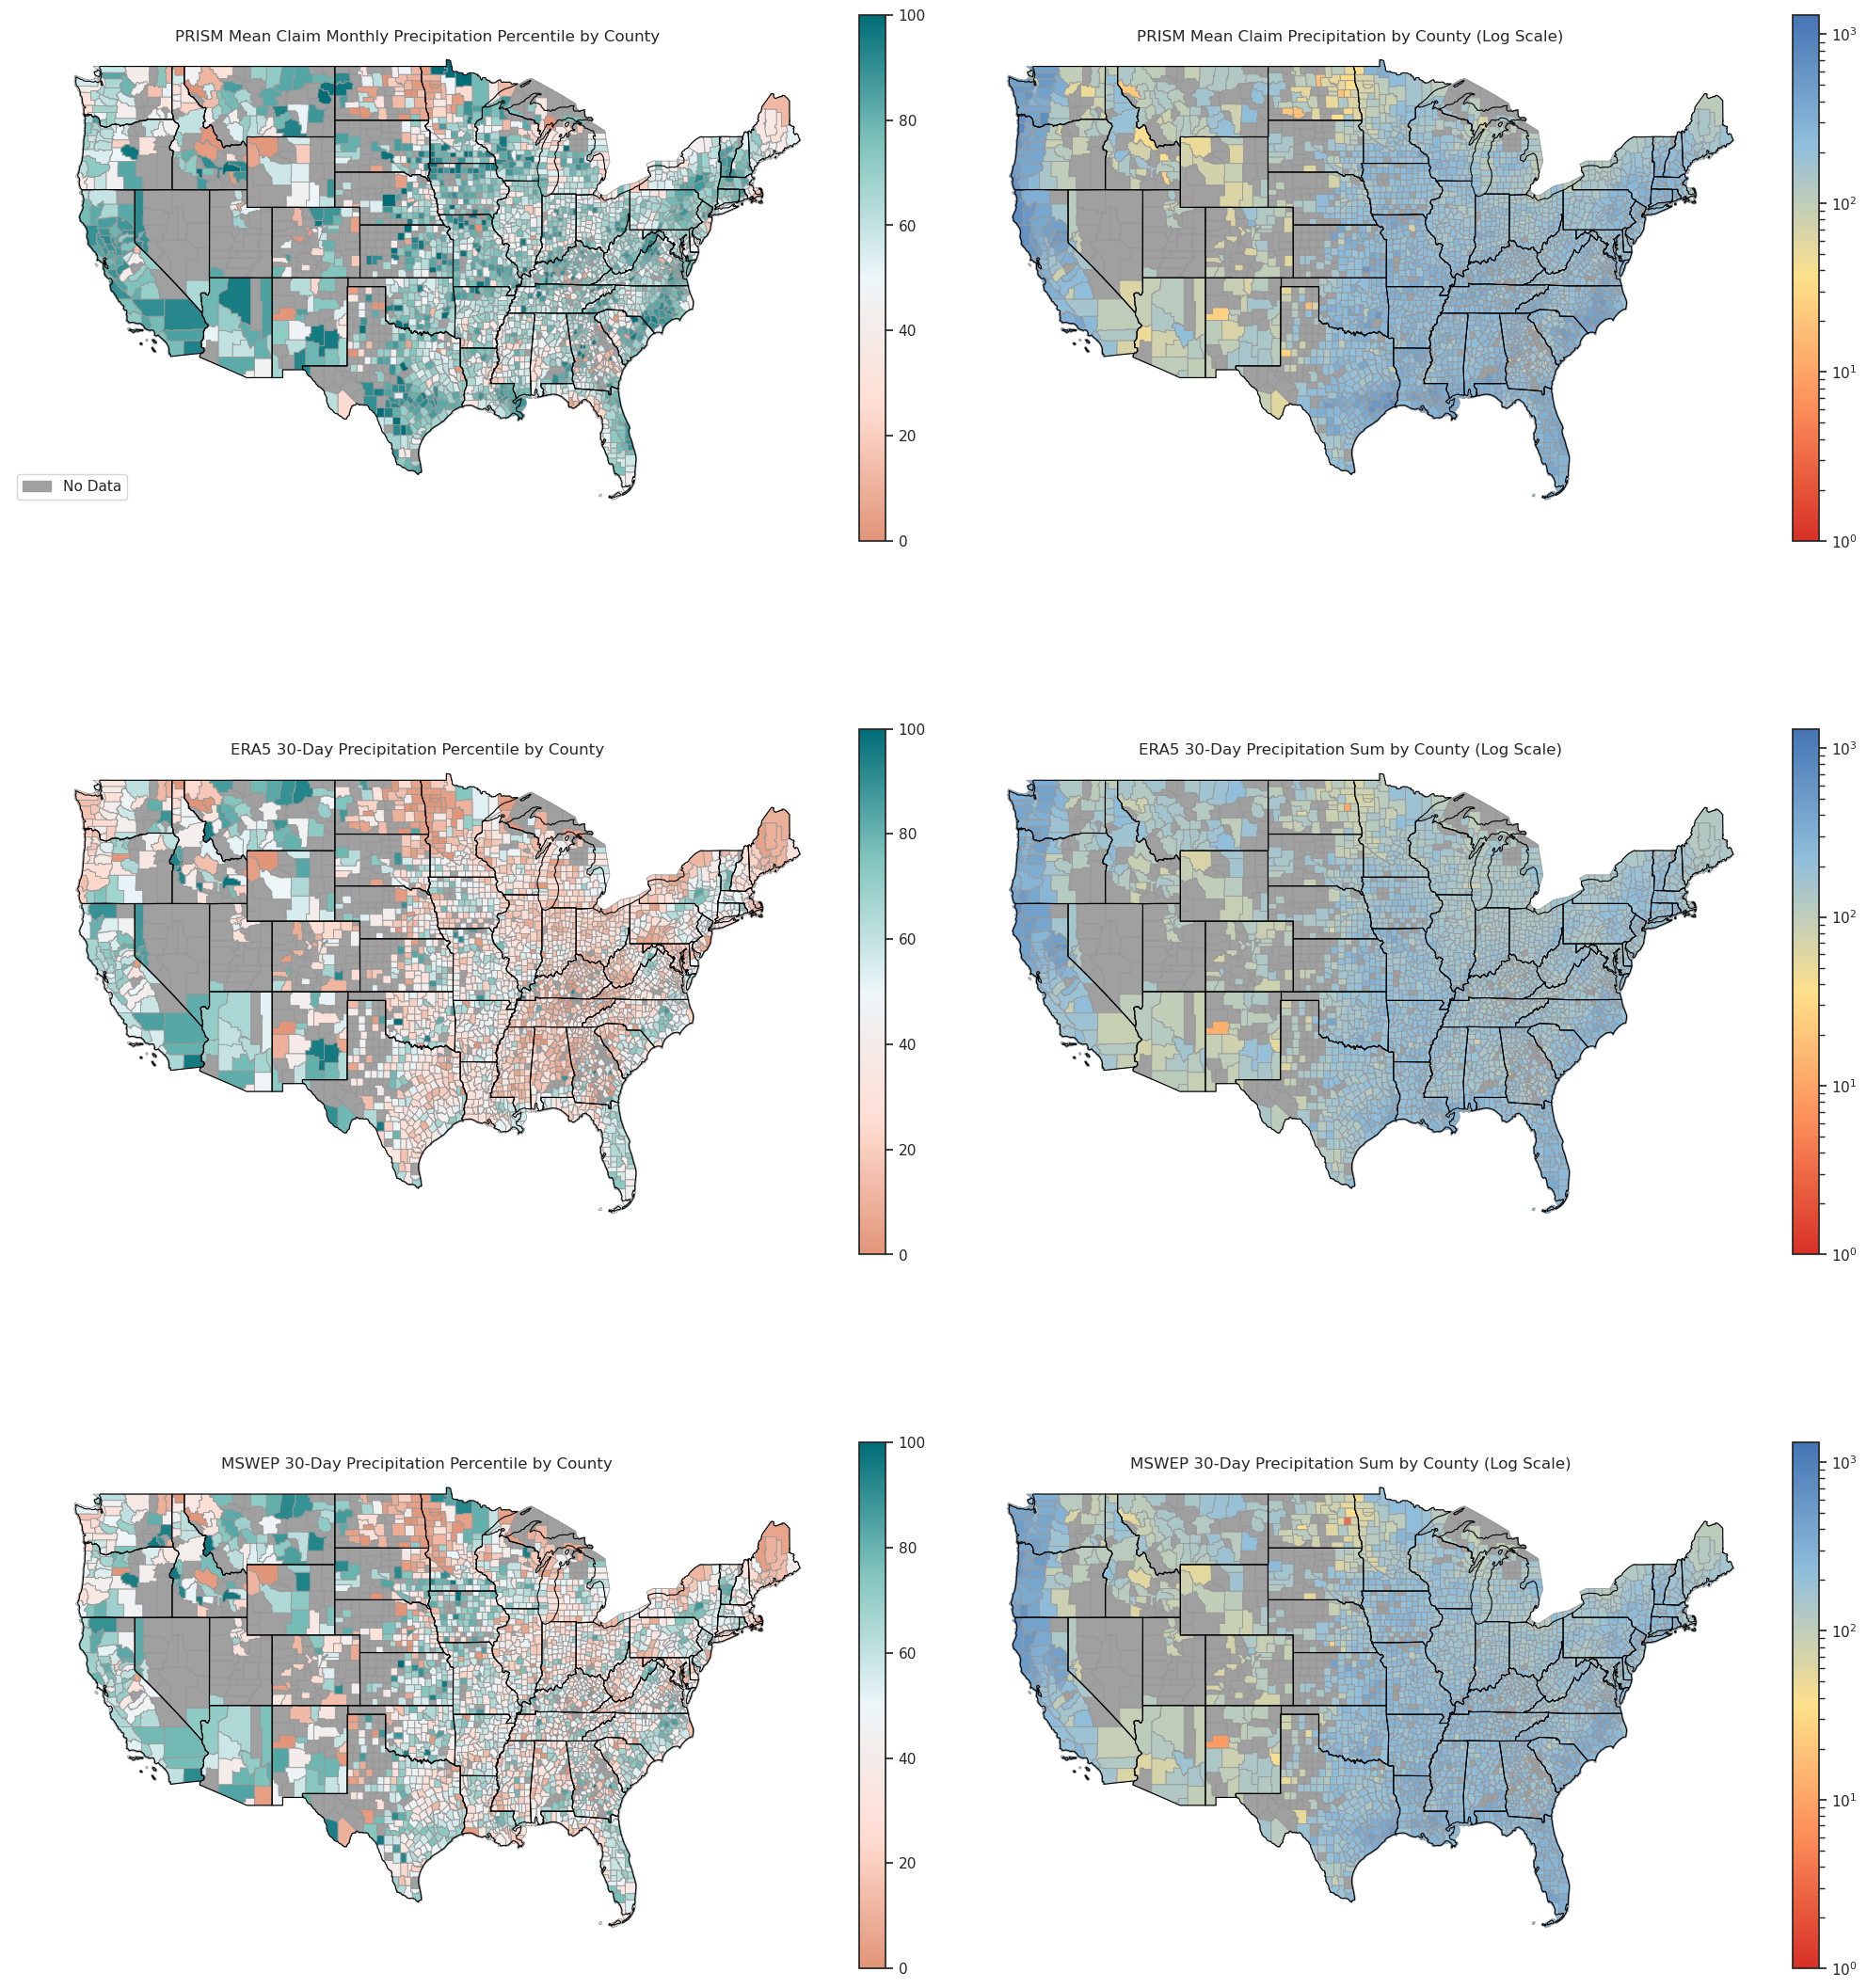

In [7]:
# Create subplots for the six different percentiles and sum values (3 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(20, 24))  # Updated to 3 rows, 2 columns

# First plot (Top left): PRISM Mean Claim Monthly Precipitation Percentile by County (0-100 scale)
gdf_counties[gdf_counties['PRISM_mon_percentile'].isna()].plot(ax=axes[0, 0], color=no_data_color, edgecolor='0.6')
gdf_counties[~gdf_counties['PRISM_mon_percentile'].isna()].plot(
    column='PRISM_mon_percentile', cmap=cmap_left, linewidth=0.6, ax=axes[0, 0], edgecolor='0.6', vmin=0, vmax=100)
axes[0, 0].set_title('PRISM Mean Claim Monthly Precipitation Percentile by County')
axes[0, 0].set_xlim(extent[0], extent[1])
axes[0, 0].set_ylim(extent[2], extent[3])
axes[0, 0].axis('off')
gdf_states.boundary.plot(ax=axes[0, 0], edgecolor='black', linewidth=0.8)

# Second plot (Top right): PRISM Mean Claim Precipitation by County (log scale 0-1300)
gdf_counties[gdf_counties['PRISM_mon_precipitation'].isna()].plot(ax=axes[0, 1], color=no_data_color, edgecolor='0.6')
gdf_counties[~gdf_counties['PRISM_mon_precipitation'].isna()].plot(
    column='PRISM_mon_precipitation', cmap=cmap_right, linewidth=0.6, ax=axes[0, 1], edgecolor='0.6', 
    norm=LogNorm(vmin=1, vmax=1300))  # Log scale normalization
axes[0, 1].set_title('PRISM Mean Claim Precipitation by County (Log Scale)')
axes[0, 1].set_xlim(extent[0], extent[1])
axes[0, 1].set_ylim(extent[2], extent[3])
axes[0, 1].axis('off')
gdf_states.boundary.plot(ax=axes[0, 1], edgecolor='black', linewidth=0.8)

# Third plot (Middle left): ERA5 30-Day Precipitation Percentile by County (0-100 scale)
gdf_counties[gdf_counties['ERA5_precipitation_30d_sum_percentile_modeled'].isna()].plot(ax=axes[1, 0], color=no_data_color, edgecolor='0.6')
gdf_counties[~gdf_counties['ERA5_precipitation_30d_sum_percentile_modeled'].isna()].plot(
    column='ERA5_precipitation_30d_sum_percentile_modeled', cmap=cmap_left, linewidth=0.6, ax=axes[1, 0], edgecolor='0.6', vmin=0, vmax=100)
axes[1, 0].set_title('ERA5 30-Day Precipitation Percentile by County')
axes[1, 0].set_xlim(extent[0], extent[1])
axes[1, 0].set_ylim(extent[2], extent[3])
axes[1, 0].axis('off')
gdf_states.boundary.plot(ax=axes[1, 0], edgecolor='black', linewidth=0.8)

# Fourth plot (Middle right): ERA5 30-Day Precipitation Sum by County (log scale 0-1300)
gdf_counties[gdf_counties['ERA5_precipitation_30d_sum'].isna()].plot(ax=axes[1, 1], color=no_data_color, edgecolor='0.6')
gdf_counties[~gdf_counties['ERA5_precipitation_30d_sum'].isna()].plot(
    column='ERA5_precipitation_30d_sum', cmap=cmap_right, linewidth=0.6, ax=axes[1, 1], edgecolor='0.6', 
    norm=LogNorm(vmin=1, vmax=1300))  # Log scale normalization
axes[1, 1].set_title('ERA5 30-Day Precipitation Sum by County (Log Scale)')
axes[1, 1].set_xlim(extent[0], extent[1])
axes[1, 1].set_ylim(extent[2], extent[3])
axes[1, 1].axis('off')
gdf_states.boundary.plot(ax=axes[1, 1], edgecolor='black', linewidth=0.8)

# Fifth plot (Bottom left): MSWEP 30-Day Precipitation Percentile by County (0-100 scale)
gdf_counties[gdf_counties['MSWEP_precipitation_30d_sum_percentile_modeled'].isna()].plot(ax=axes[2, 0], color=no_data_color, edgecolor='0.6')
gdf_counties[~gdf_counties['MSWEP_precipitation_30d_sum_percentile_modeled'].isna()].plot(
    column='MSWEP_precipitation_30d_sum_percentile_modeled', cmap=cmap_left, linewidth=0.6, ax=axes[2, 0], edgecolor='0.6', vmin=0, vmax=100)
axes[2, 0].set_title('MSWEP 30-Day Precipitation Percentile by County')
axes[2, 0].set_xlim(extent[0], extent[1])
axes[2, 0].set_ylim(extent[2], extent[3])
axes[2, 0].axis('off')
gdf_states.boundary.plot(ax=axes[2, 0], edgecolor='black', linewidth=0.8)

# Sixth plot (Bottom right): MSWEP 30-Day Precipitation Sum by County (log scale 0-1300)
gdf_counties[gdf_counties['MSWEP_precipitation_30d_sum'].isna()].plot(ax=axes[2, 1], color=no_data_color, edgecolor='0.6')
gdf_counties[~gdf_counties['MSWEP_precipitation_30d_sum'].isna()].plot(
    column='MSWEP_precipitation_30d_sum', cmap=cmap_right, linewidth=0.6, ax=axes[2, 1], edgecolor='0.6', 
    norm=LogNorm(vmin=1, vmax=1300))  # Log scale normalization
axes[2, 1].set_title('MSWEP 30-Day Precipitation Sum by County (Log Scale)')
axes[2, 1].set_xlim(extent[0], extent[1])
axes[2, 1].set_ylim(extent[2], extent[3])
axes[2, 1].axis('off')
gdf_states.boundary.plot(ax=axes[2, 1], edgecolor='black', linewidth=0.8)

# Add colorbars with appropriate scales
sm1 = plt.cm.ScalarMappable(cmap=cmap_left, norm=plt.Normalize(vmin=0, vmax=100))
sm2 = plt.cm.ScalarMappable(cmap=cmap_right, norm=LogNorm(vmin=1, vmax=1300))

cbar1 = fig.colorbar(sm1, ax=axes[0, 0], orientation='vertical', fraction=0.03, pad=0.04)
cbar2 = fig.colorbar(sm2, ax=axes[0, 1], orientation='vertical', fraction=0.03, pad=0.04)
cbar3 = fig.colorbar(sm1, ax=axes[1, 0], orientation='vertical', fraction=0.03, pad=0.04)
cbar4 = fig.colorbar(sm2, ax=axes[1, 1], orientation='vertical', fraction=0.03, pad=0.04)
cbar5 = fig.colorbar(sm1, ax=axes[2, 0], orientation='vertical', fraction=0.03, pad=0.04)
cbar6 = fig.colorbar(sm2, ax=axes[2, 1], orientation='vertical', fraction=0.03, pad=0.04)

# Add a custom legend for "No Data"
no_data_patch = mpatches.Patch(color=no_data_color, label='No Data')
axes[0, 0].legend(handles=[no_data_patch], loc='lower left')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

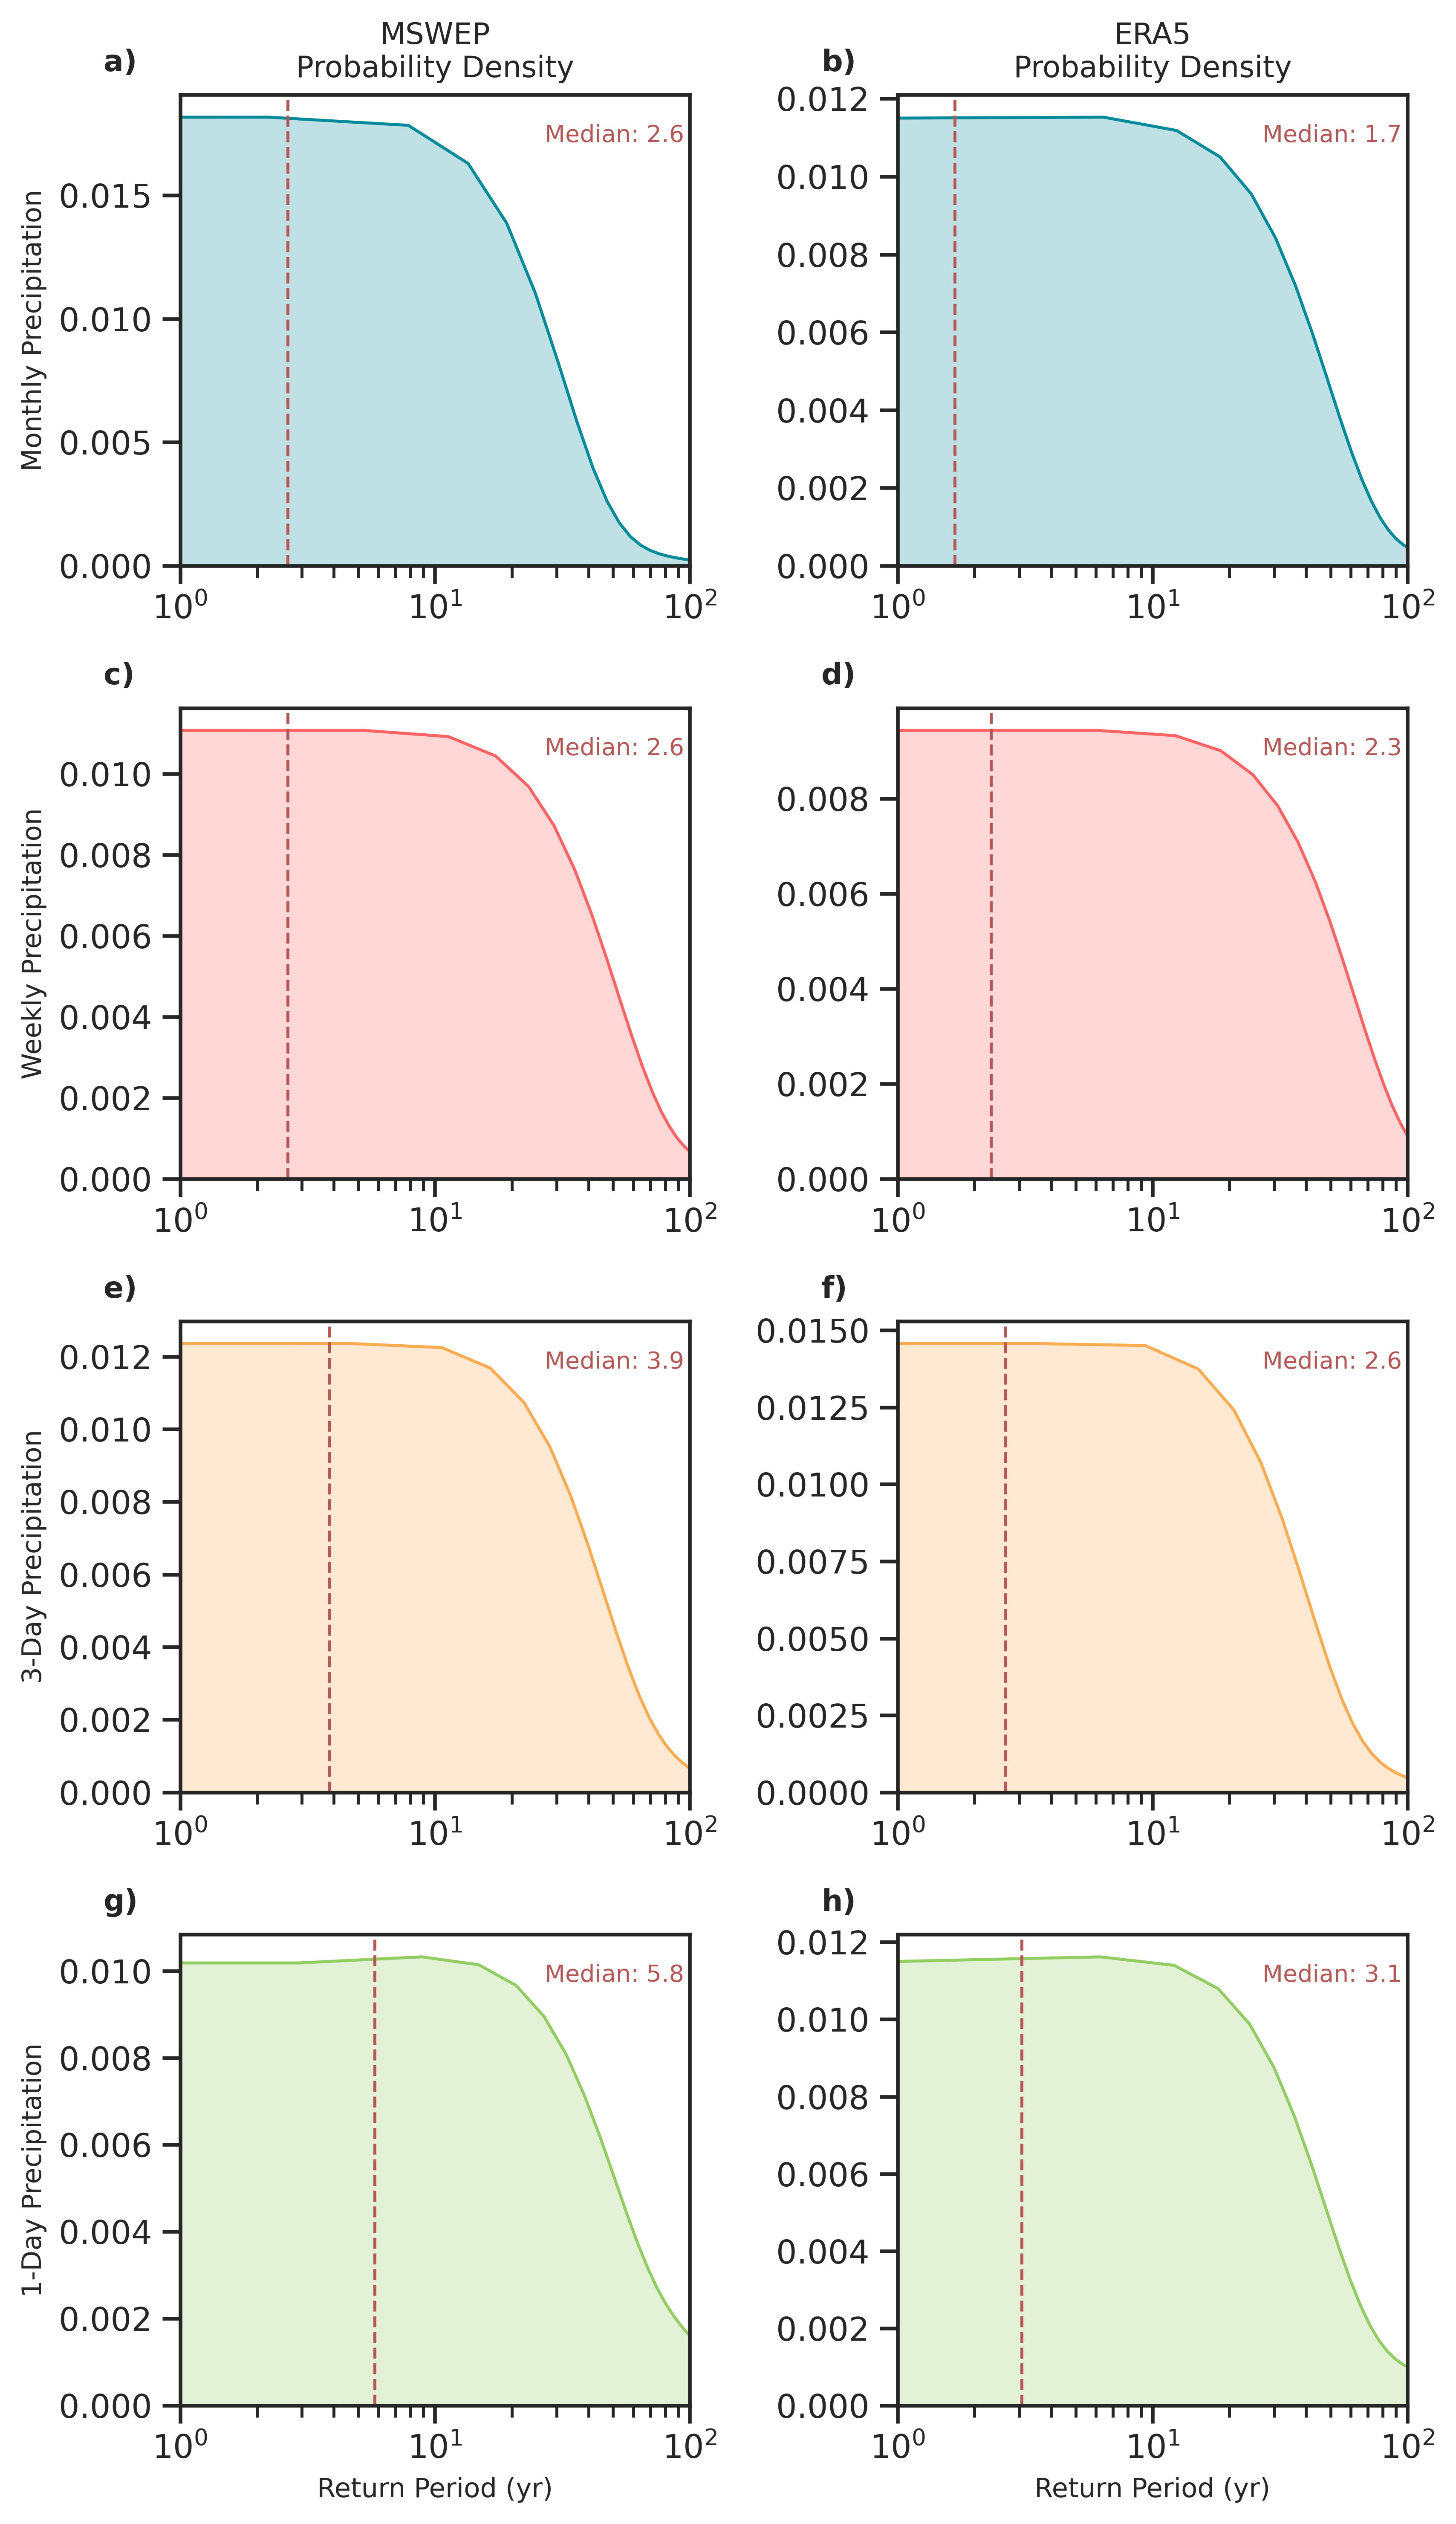

In [8]:
# Set figure size with width constraint of 7.09 inches (~180mm)
fig_width = 7.09  # inches
fig_height = 12 # Adjust for four rows of two plots
fig = plt.figure(figsize=(fig_width, fig_height), dpi=500)

# Define log-spaced bins for a range from 1 to 100, for example
bins = np.logspace(np.log10(1), np.log10(100), 50)

# Adjust the grid to have four rows and two columns
gs = fig.add_gridspec(4, 2)

# Create axes for the eight subplots (top rows for MSWEP PDFs, bottom rows for ERA5 PDFs)
axes = [
    fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[0, 1]),
    fig.add_subplot(gs[1, 0]), fig.add_subplot(gs[1, 1]),
    fig.add_subplot(gs[2, 0]), fig.add_subplot(gs[2, 1]),
    fig.add_subplot(gs[3, 0]), fig.add_subplot(gs[3, 1])
]

# Set the overall figure title
#fig.suptitle('NFIP Claim Precipitation Return Periods', fontsize=11, y=1.0)

# Define axis titles and labels
titles = ['Monthly Precipitation', 'Weekly Precipitation', '3-Day Precipitation', '1-Day Precipitation']
left_labels = ['MSWEP\nProbability Density', 'ERA5\nProbability Density']
bottom_label = 'Return Period (yr)'

# Plot for Monthly Return Period (MSWEP)
#sns.histplot(filtered_claims_df['returnPeriod_MSWEP_30d'], bins=bins, color='#B2DBE0', edgecolor='grey', stat='density', alpha=0.8, ax=axes[0])
sns.kdeplot(filtered_claims_df['returnPeriod_MSWEP_30d'], color='#008A9A', bw_adjust=10, ax=axes[0], fill=True)
axes[0].axvline(filtered_claims_df['returnPeriod_MSWEP_30d'].median(), color='#B65655', linestyle='--', lw=1)
axes[0].text(95, axes[0].get_ylim()[1] * 0.9, f'Median: {filtered_claims_df["returnPeriod_MSWEP_30d"].median():.1f}', color='#B65655', ha='right', fontsize=8)
axes[0].set_title(left_labels[0], fontsize=10)
axes[0].set_ylabel(titles[0], fontsize=9)
axes[0].set_xlabel('', fontsize=9)
axes[0].set_xscale("log")
axes[0].text(-0.15, 1.05, 'a)', transform=axes[0].transAxes, size=10, weight='bold')
axes[0].set_xlim(1, 100)

# Plot for Monthly Return Period (ERA5)
#sns.histplot(filtered_claims_df['returnPeriod_ERA5_30d'], bins=50, color='#B2DBE0', edgecolor='grey', stat='density', alpha=0.8, ax=axes[1])
sns.kdeplot(filtered_claims_df['returnPeriod_ERA5_30d'], color='#008A9A', bw_adjust=10, ax=axes[1], fill=True)
axes[1].axvline(filtered_claims_df['returnPeriod_ERA5_30d'].median(), color='#B65655', linestyle='--', lw=1)
axes[1].text(95, axes[1].get_ylim()[1] * 0.9, f'Median: {filtered_claims_df["returnPeriod_ERA5_30d"].median():.1f}', color='#B65655', ha='right', fontsize=8)
axes[1].set_title(left_labels[1], fontsize=10)
axes[1].set_ylabel('', fontsize=10)
axes[1].set_xlabel('', fontsize=9)
axes[1].set_xscale("log")
axes[1].text(-0.15, 1.05, 'b)', transform=axes[1].transAxes, size=10, weight='bold')
axes[1].set_xlim(1, 100)

# Plot for Weekly Return Period (MSWEP)
#sns.histplot(filtered_claims_df['returnPeriod_MSWEP_7d'], bins=50, color='#ff9183', edgecolor='grey', stat='density', alpha=0.8, ax=axes[2])
sns.kdeplot(filtered_claims_df['returnPeriod_MSWEP_7d'], color='#ff6363', bw_adjust=10, ax=axes[2], fill=True)
axes[2].axvline(filtered_claims_df['returnPeriod_MSWEP_7d'].median(), color='#B65655', linestyle='--', lw=1)
axes[2].text(95, axes[2].get_ylim()[1] * 0.9, f'Median: {filtered_claims_df["returnPeriod_MSWEP_7d"].median():.1f}', color='#B65655', ha='right', fontsize=8)
axes[2].set_ylabel(titles[1], fontsize=9)
axes[2].set_xlabel('', fontsize=9)
axes[2].set_xscale("log")
axes[2].text(-0.15, 1.05, 'c)', transform=axes[2].transAxes, size=10, weight='bold')
axes[2].set_xlim(1, 100)

# Plot for Weekly Return Period (ERA5)
#sns.histplot(filtered_claims_df['returnPeriod_ERA5_7d'], bins=50, color='#ff9183', edgecolor='grey', stat='density', alpha=0.8, ax=axes[3])
sns.kdeplot(filtered_claims_df['returnPeriod_ERA5_7d'], color='#ff6363', bw_adjust=10, ax=axes[3], fill=True)
axes[3].axvline(filtered_claims_df['returnPeriod_ERA5_7d'].median(), color='#B65655', linestyle='--', lw=1)
axes[3].text(95, axes[3].get_ylim()[1] * 0.9, f'Median: {filtered_claims_df["returnPeriod_ERA5_7d"].median():.1f}', color='#B65655', ha='right', fontsize=8)
axes[3].set_ylabel('', fontsize=9)
axes[3].set_xlabel('', fontsize=9)
axes[3].set_xscale("log")
axes[3].text(-0.15, 1.05, 'd)', transform=axes[3].transAxes, size=10, weight='bold')
axes[3].set_xlim(1, 100)

# Plot for 3-Day Return Period (MSWEP)
#sns.histplot(filtered_claims_df['returnPeriod_MSWEP_3d'], bins=50, color='#ffc383', edgecolor='grey', stat='density', alpha=0.8, ax=axes[4])
sns.kdeplot(filtered_claims_df['returnPeriod_MSWEP_3d'], color='#ffab50', bw_adjust=10, ax=axes[4], fill=True)
axes[4].axvline(filtered_claims_df['returnPeriod_MSWEP_3d'].median(), color='#B65655', linestyle='--', lw=1)
axes[4].text(95, axes[4].get_ylim()[1] * 0.9, f'Median: {filtered_claims_df["returnPeriod_MSWEP_3d"].median():.1f}', color='#B65655', ha='right', fontsize=8)
axes[4].set_ylabel(titles[2], fontsize=9)
axes[4].set_xlabel('', fontsize=9)
axes[4].set_xscale("log")
axes[4].text(-0.15, 1.05, 'e)', transform=axes[4].transAxes, size=10, weight='bold')
axes[4].set_xlim(1, 100)

# Plot for 3-Day Return Period (ERA5)
#sns.histplot(filtered_claims_df['returnPeriod_ERA5_3d'], bins=50, color='#ffc383', edgecolor='grey', stat='density', alpha=0.8, ax=axes[5])
sns.kdeplot(filtered_claims_df['returnPeriod_ERA5_3d'], color='#ffab50', bw_adjust=10, ax=axes[5], fill=True)
axes[5].axvline(filtered_claims_df['returnPeriod_ERA5_3d'].median(), color='#B65655', linestyle='--', lw=1)
axes[5].text(95, axes[5].get_ylim()[1] * 0.9, f'Median: {filtered_claims_df["returnPeriod_ERA5_3d"].median():.1f}', color='#B65655', ha='right', fontsize=8)
axes[5].set_ylabel('', fontsize=9)
axes[5].set_xlabel('', fontsize=9)
axes[5].set_xscale("log")
axes[5].text(-0.15, 1.05, 'f)', transform=axes[5].transAxes, size=10, weight='bold')
axes[5].set_xlim(1, 100)

# Plot for 1-Day Return Period (MSWEP)
#sns.histplot(filtered_claims_df['returnPeriod_MSWEP_1d'], bins=50, color='#9EDF9C', edgecolor='grey', stat='density', alpha=0.8, ax=axes[6])
sns.kdeplot(filtered_claims_df['returnPeriod_MSWEP_1d'], color='#92cd62', bw_adjust=10, ax=axes[6], fill=True)
axes[6].axvline(filtered_claims_df['returnPeriod_MSWEP_1d'].median(), color='#B65655', linestyle='--', lw=1)
axes[6].text(95, axes[6].get_ylim()[1] * 0.9, f'Median: {filtered_claims_df["returnPeriod_MSWEP_1d"].median():.1f}', color='#B65655', ha='right', fontsize=8)
axes[6].set_ylabel(titles[3], fontsize=9)
axes[6].set_xlabel('', fontsize=9)
axes[6].set_xscale("log")
axes[6].text(-0.15, 1.05, 'g)', transform=axes[6].transAxes, size=10, weight='bold')
axes[6].set_xlim(1, 100)
axes[6].set_xlabel(bottom_label, fontsize=9)

# Plot for 1-Day Return Period (ERA5)
#sns.histplot(filtered_claims_df['returnPeriod_ERA5_1d'], bins=50, color='#9EDF9C', edgecolor='grey', stat='density', alpha=0.8, ax=axes[7])
sns.kdeplot(filtered_claims_df['returnPeriod_ERA5_1d'], color='#92cd62', bw_adjust=10, ax=axes[7], fill=True)
axes[7].axvline(filtered_claims_df['returnPeriod_ERA5_1d'].median(), color='#B65655', linestyle='--', lw=1)
axes[7].text(95, axes[7].get_ylim()[1] * 0.9, f'Median: {filtered_claims_df["returnPeriod_ERA5_1d"].median():.1f}', color='#B65655', ha='right', fontsize=8)
axes[7].text(-0.15, 1.05, 'h)', transform=axes[7].transAxes, size=10, weight='bold')
axes[7].set_xscale("log")
axes[7].set_xlim(1, 100)
axes[7].set_ylabel('', fontsize=9)
axes[7].set_xlabel(bottom_label, fontsize=9)

# Adjust layout and show
plt.tight_layout()
if save:
    plt.savefig('Plots/Fig_5_Dur_Sensitivity.png', dpi=500)
plt.show()

In [9]:
# Function to label medians
def label_medians(ax, data):
    for i, dataset in enumerate(data):
        median = dataset.median()
        ax.annotate(
            f'{median:.1f}', 
            xy=(i, median), 
            xycoords='data', 
            xytext=(0, 5), 
            textcoords='offset points', 
            ha='center', 
            fontsize=8, 
            color='black', 
            weight='bold'
        )

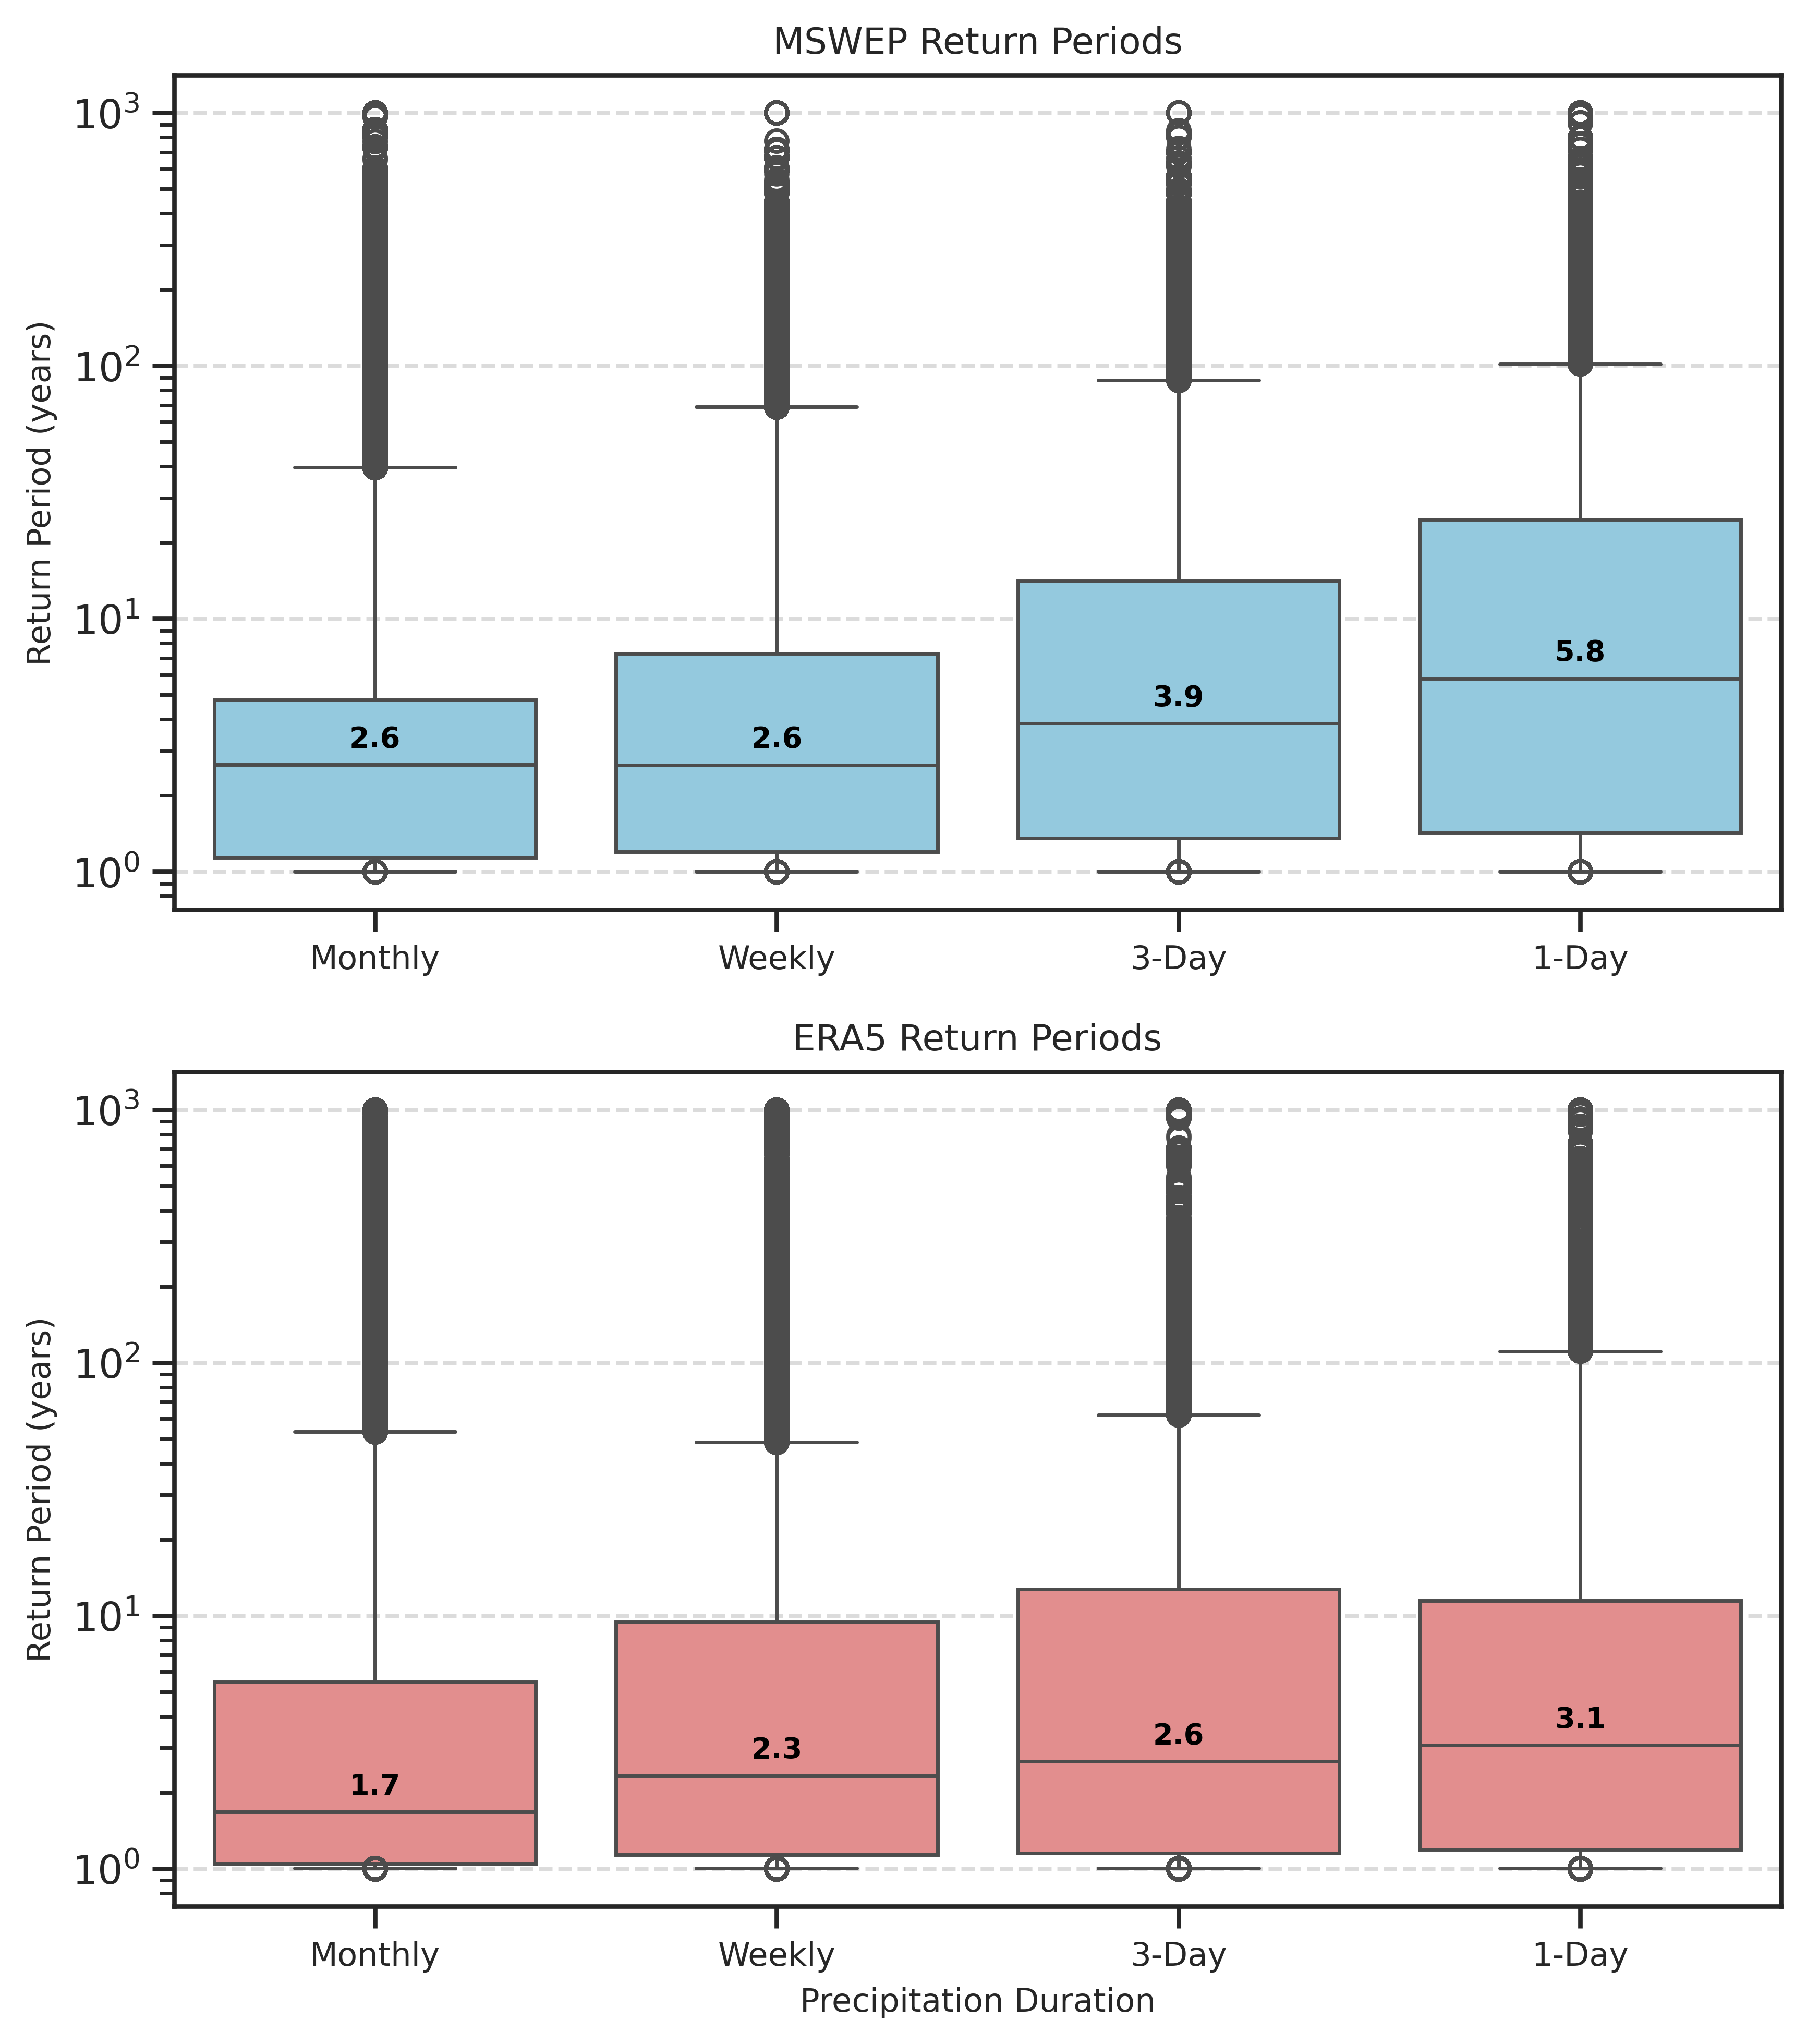

In [10]:
# Set figure size with a width constraint of 7.09 inches (~180mm)
fig_width = 7.09  # inches
fig_height = 8    # Adjust height for two rows
fig, axes = plt.subplots(2, 1, figsize=(fig_width, fig_height), dpi=500)

# Define the data and labels
data_labels = ['Monthly', 'Weekly', '3-Day', '1-Day']
columns_msw = [
    'returnPeriod_MSWEP_30d', 
    'returnPeriod_MSWEP_7d', 
    'returnPeriod_MSWEP_3d', 
    'returnPeriod_MSWEP_1d'
]
columns_era = [
    'returnPeriod_ERA5_30d', 
    'returnPeriod_ERA5_7d', 
    'returnPeriod_ERA5_3d', 
    'returnPeriod_ERA5_1d'
]

# Prepare data for MSWEP and ERA5
data_msw = [filtered_claims_df[col] for col in columns_msw]
data_era = [filtered_claims_df[col] for col in columns_era]

# Titles for the subplots
titles = ['MSWEP Return Periods', 'ERA5 Return Periods']

# Plotting the boxplots
sns.boxplot(data=data_msw, ax=axes[0], showfliers=True, color='skyblue', whis=[5, 95])
sns.boxplot(data=data_era, ax=axes[1], showfliers=True, color='lightcoral', whis=[5, 95])

# Add median labels
label_medians(axes[0], data_msw)
label_medians(axes[1], data_era)

# Set subplot titles
for i, ax in enumerate(axes):
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks(range(len(data_labels)))
    ax.set_xticklabels(data_labels, fontsize=9)
    ax.set_yscale("log")
    ax.set_ylabel('Return Period (years)', fontsize=9)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add a common xlabel for all plots
axes[1].set_xlabel('Precipitation Duration', fontsize=9)

# Adjust layout and save the plot if needed
plt.tight_layout()
if save:
    plt.savefig('Plots/Fig_5_Boxplots.png', dpi=500)
plt.show()

In [11]:
# Load the combined Processed_Claims.csv file
processed_buyouts_file = perc_filter+"/final_filtered_buyouts.csv"
filtered_buyouts_df = pd.read_csv(processed_buyouts_file)

# Ensure that 'countyCode' is properly formatted as a 5-character string
filtered_buyouts_df['countyCode'] = filtered_buyouts_df['countyCode'].astype(int).astype(str)
filtered_buyouts_df['countyCode'] = filtered_buyouts_df['countyCode'].apply(lambda x: str(x).zfill(5))

/tmp/ipykernel_2439/3901146872.py:3: DtypeWarning: Columns (15,38,47) have mixed types. Specify dtype option on import or set low_memory=False.
  filtered_buyouts_df = pd.read_csv(processed_buyouts_file)


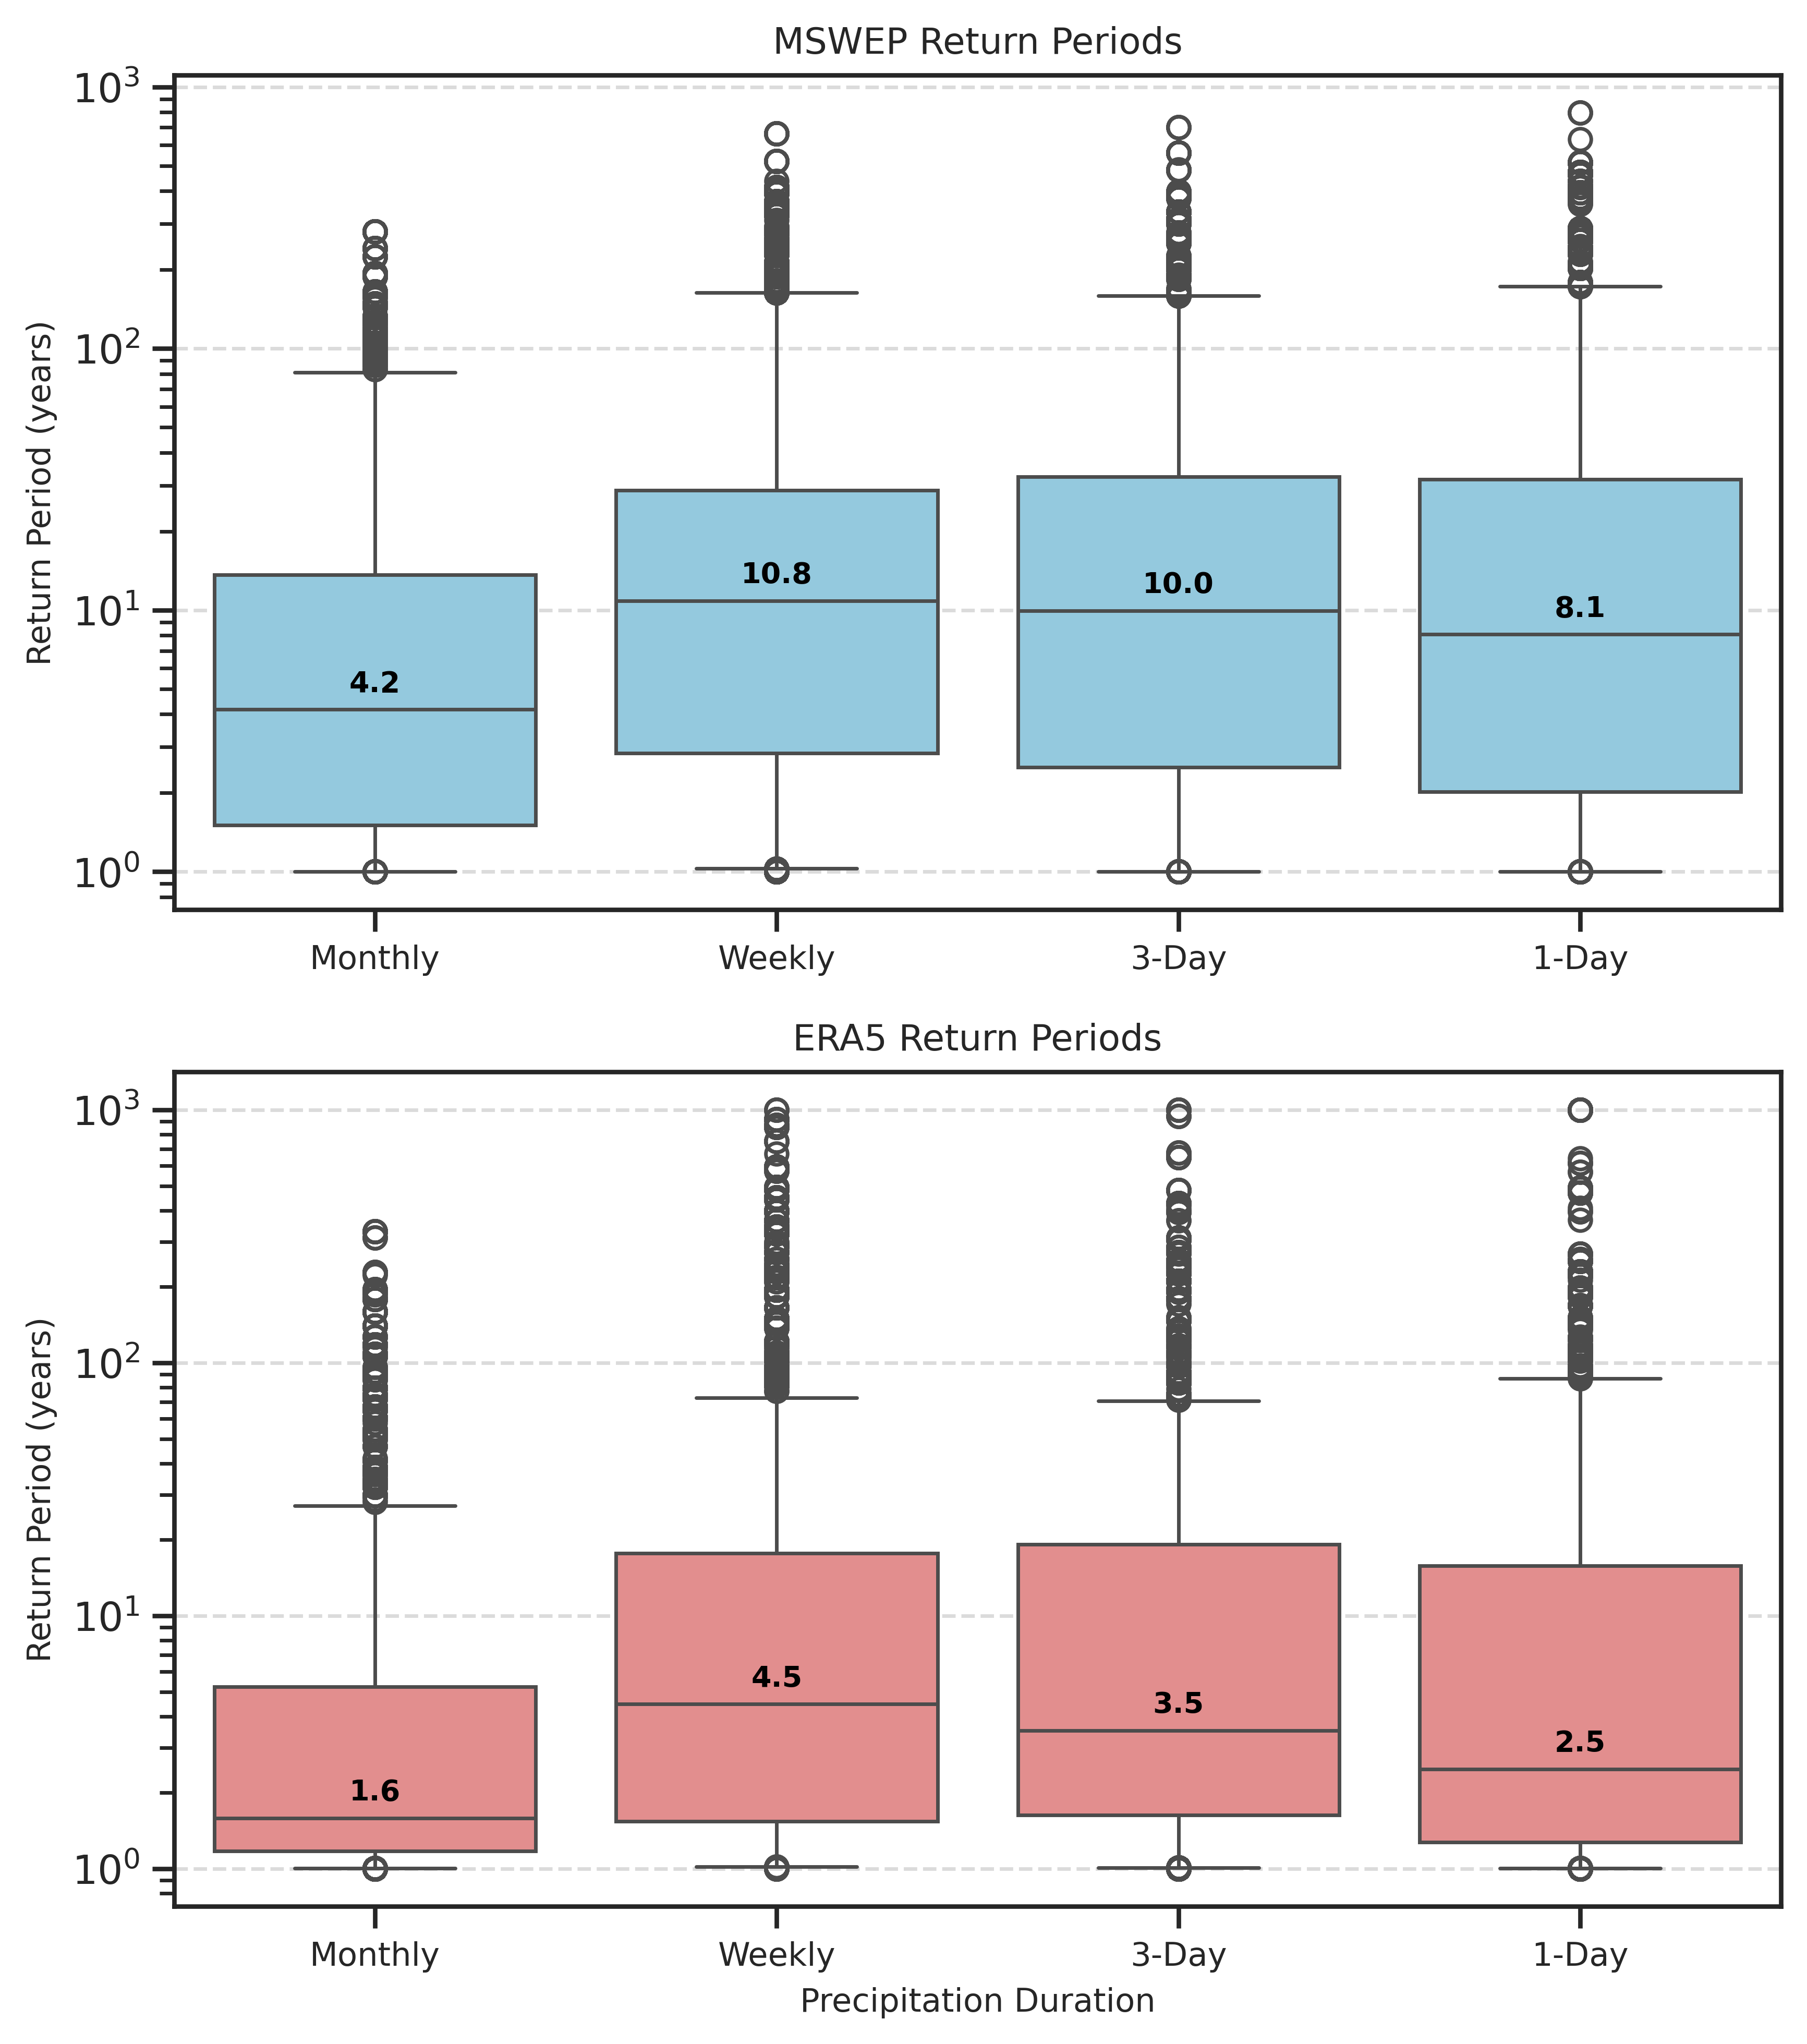

In [12]:
# Set figure size with a width constraint of 7.09 inches (~180mm)
fig_width = 7.09  # inches
fig_height = 8    # Adjust height for two rows
fig, axes = plt.subplots(2, 1, figsize=(fig_width, fig_height), dpi=500)

# Define the data and labels
data_labels = ['Monthly', 'Weekly', '3-Day', '1-Day']
columns_msw = [
    'returnPeriod_MSWEP_30d', 
    'returnPeriod_MSWEP_7d', 
    'returnPeriod_MSWEP_3d', 
    'returnPeriod_MSWEP_1d'
]
columns_era = [
    'returnPeriod_ERA5_30d', 
    'returnPeriod_ERA5_7d', 
    'returnPeriod_ERA5_3d', 
    'returnPeriod_ERA5_1d'
]

# Prepare data for MSWEP and ERA5
data_msw_buyouts = [filtered_buyouts_df[col] for col in columns_msw]
data_era_buyouts = [filtered_buyouts_df[col] for col in columns_era]

# Titles for the subplots
titles = ['MSWEP Return Periods', 'ERA5 Return Periods']

# Plotting the boxplots
sns.boxplot(data=data_msw_buyouts, ax=axes[0], showfliers=True, color='skyblue', whis=[5, 95])
sns.boxplot(data=data_era_buyouts, ax=axes[1], showfliers=True, color='lightcoral', whis=[5, 95])

# Add median labels
label_medians(axes[0], data_msw_buyouts)
label_medians(axes[1], data_era_buyouts)

# Set subplot titles
for i, ax in enumerate(axes):
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks(range(len(data_labels)))
    ax.set_xticklabels(data_labels, fontsize=9)
    ax.set_yscale("log")
    ax.set_ylabel('Return Period (years)', fontsize=9)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add a common xlabel for all plots
axes[1].set_xlabel('Precipitation Duration', fontsize=9)

# Adjust layout and save the plot if needed
plt.tight_layout()
if save:
    plt.savefig('Plots/Fig_5_Boxplots.png', dpi=500)
plt.show()

In [13]:
# Read the two CSV files
owners_df = pd.read_csv(perc_filter+"/final_filtered_aid_owners.csv")
renters_df = pd.read_csv(perc_filter+"/final_filtered_aid_renters.csv")

# Concatenate the dataframes
filtered_aid_df = pd.concat([owners_df, renters_df], ignore_index=True)
filtered_aid_df = filtered_aid_df.rename(columns={"fullFIPS": "countyCode"})

# Replace NaNs with 0 and ensure all values are non-negative integers
filtered_aid_df['approvedForFemaAssistance'] = pd.to_numeric(
    filtered_aid_df['approvedForFemaAssistance'], errors='coerce'
).fillna(0).clip(lower=0).astype(int)

# Ensure the column is an integer (it should represent the number of repetitions)
filtered_aid_df = filtered_aid_df.loc[filtered_aid_df.index.repeat(filtered_aid_df['approvedForFemaAssistance'])]

# Reset the index (optional, for a cleaner index after repetition)
filtered_aid_df = filtered_aid_df.reset_index(drop=True)

# Ensure that 'countyCode' is properly formatted as a 5-character string
filtered_aid_df['countyCode'] = filtered_aid_df['countyCode'].astype(int).astype(str)
filtered_aid_df['countyCode'] = filtered_aid_df['countyCode'].apply(lambda x: str(x).zfill(5))

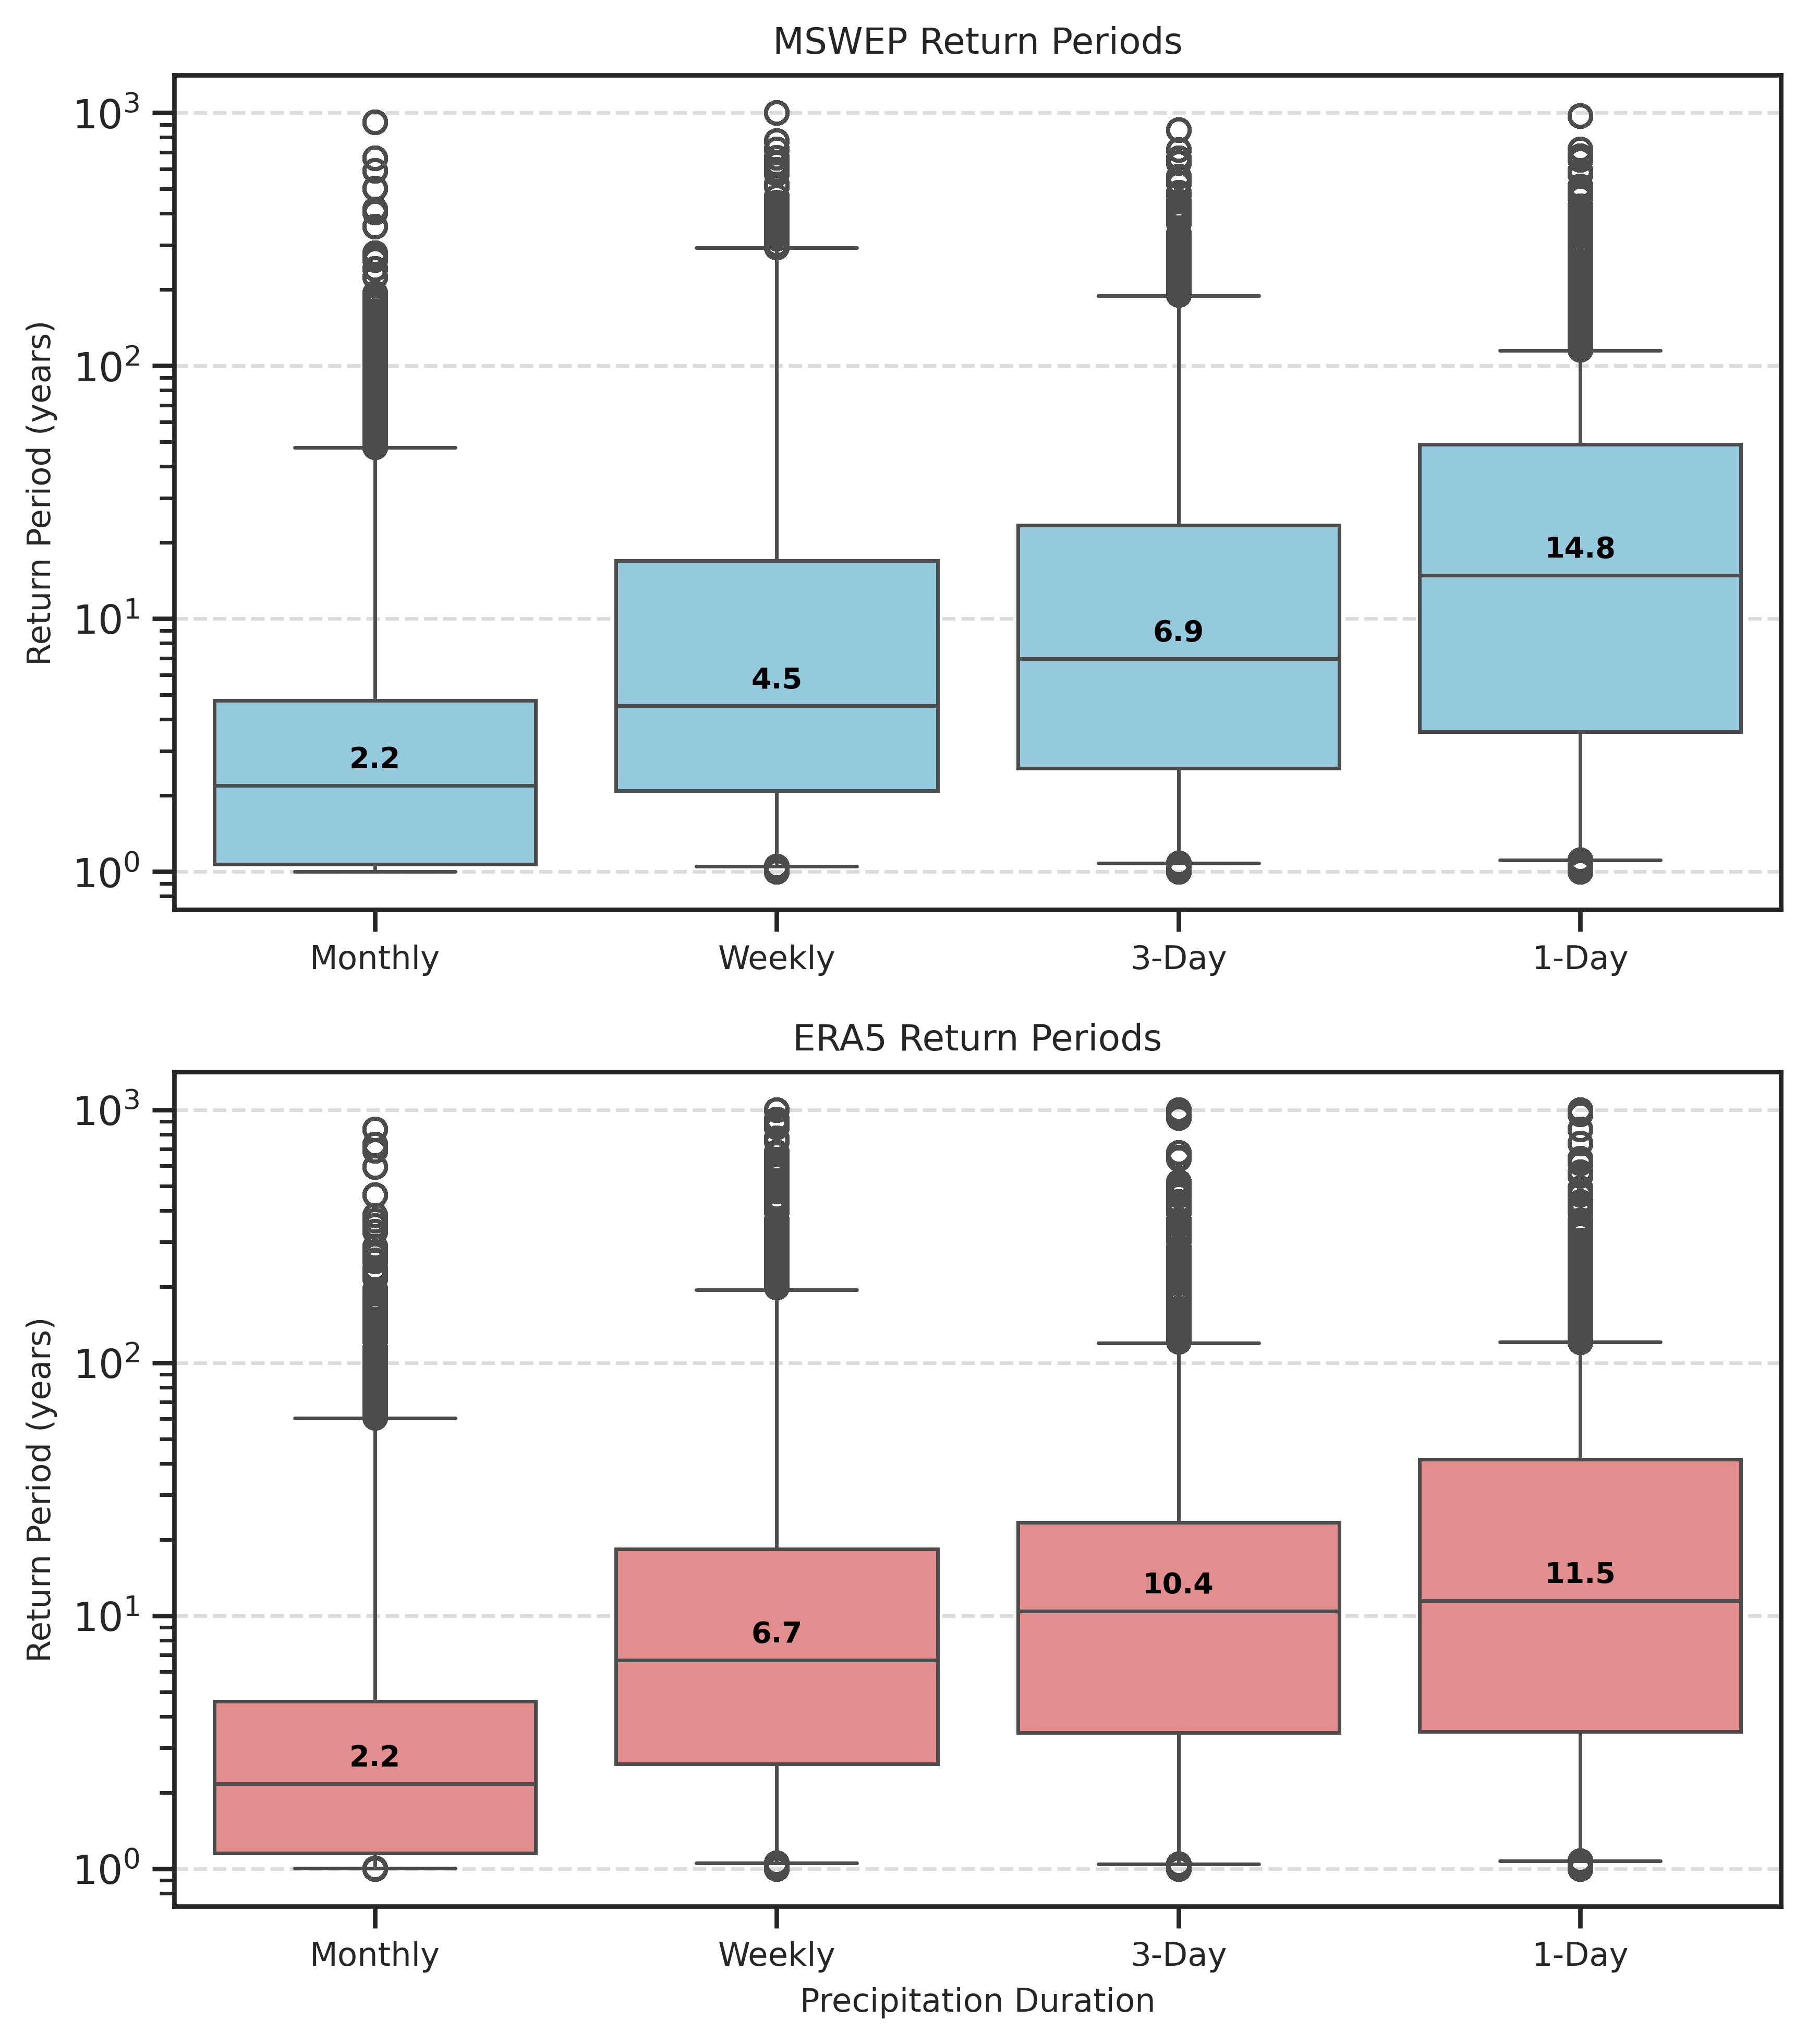

In [14]:
# Set figure size with a width constraint of 7.09 inches (~180mm)
fig_width = 7.09  # inches
fig_height = 8    # Adjust height for two rows
fig, axes = plt.subplots(2, 1, figsize=(fig_width, fig_height), dpi=500)

# Define the data and labels
data_labels = ['Monthly', 'Weekly', '3-Day', '1-Day']
columns_msw = [
    'returnPeriod_MSWEP_30d', 
    'returnPeriod_MSWEP_7d', 
    'returnPeriod_MSWEP_3d', 
    'returnPeriod_MSWEP_1d'
]
columns_era = [
    'returnPeriod_ERA5_30d', 
    'returnPeriod_ERA5_7d', 
    'returnPeriod_ERA5_3d', 
    'returnPeriod_ERA5_1d'
]

# Prepare data for MSWEP and ERA5
data_msw_aid = [filtered_aid_df[col] for col in columns_msw]
data_era_aid = [filtered_aid_df[col] for col in columns_era]

# Titles for the subplots
titles = ['MSWEP Return Periods', 'ERA5 Return Periods']

# Plotting the boxplots
sns.boxplot(data=data_msw_aid, ax=axes[0], showfliers=True, color='skyblue', whis=[5, 95])
sns.boxplot(data=data_era_aid, ax=axes[1], showfliers=True, color='lightcoral', whis=[5, 95])

# Add median labels
label_medians(axes[0], data_msw_aid)
label_medians(axes[1], data_era_aid)

# Set subplot titles
for i, ax in enumerate(axes):
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks(range(len(data_labels)))
    ax.set_xticklabels(data_labels, fontsize=9)
    ax.set_yscale("log")
    ax.set_ylabel('Return Period (years)', fontsize=9)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add a common xlabel for all plots
axes[1].set_xlabel('Precipitation Duration', fontsize=9)

# Adjust layout and save the plot if needed
plt.tight_layout()
if save:
    plt.savefig('Plots/Fig_5_Boxplots.png', dpi=500)
plt.show()

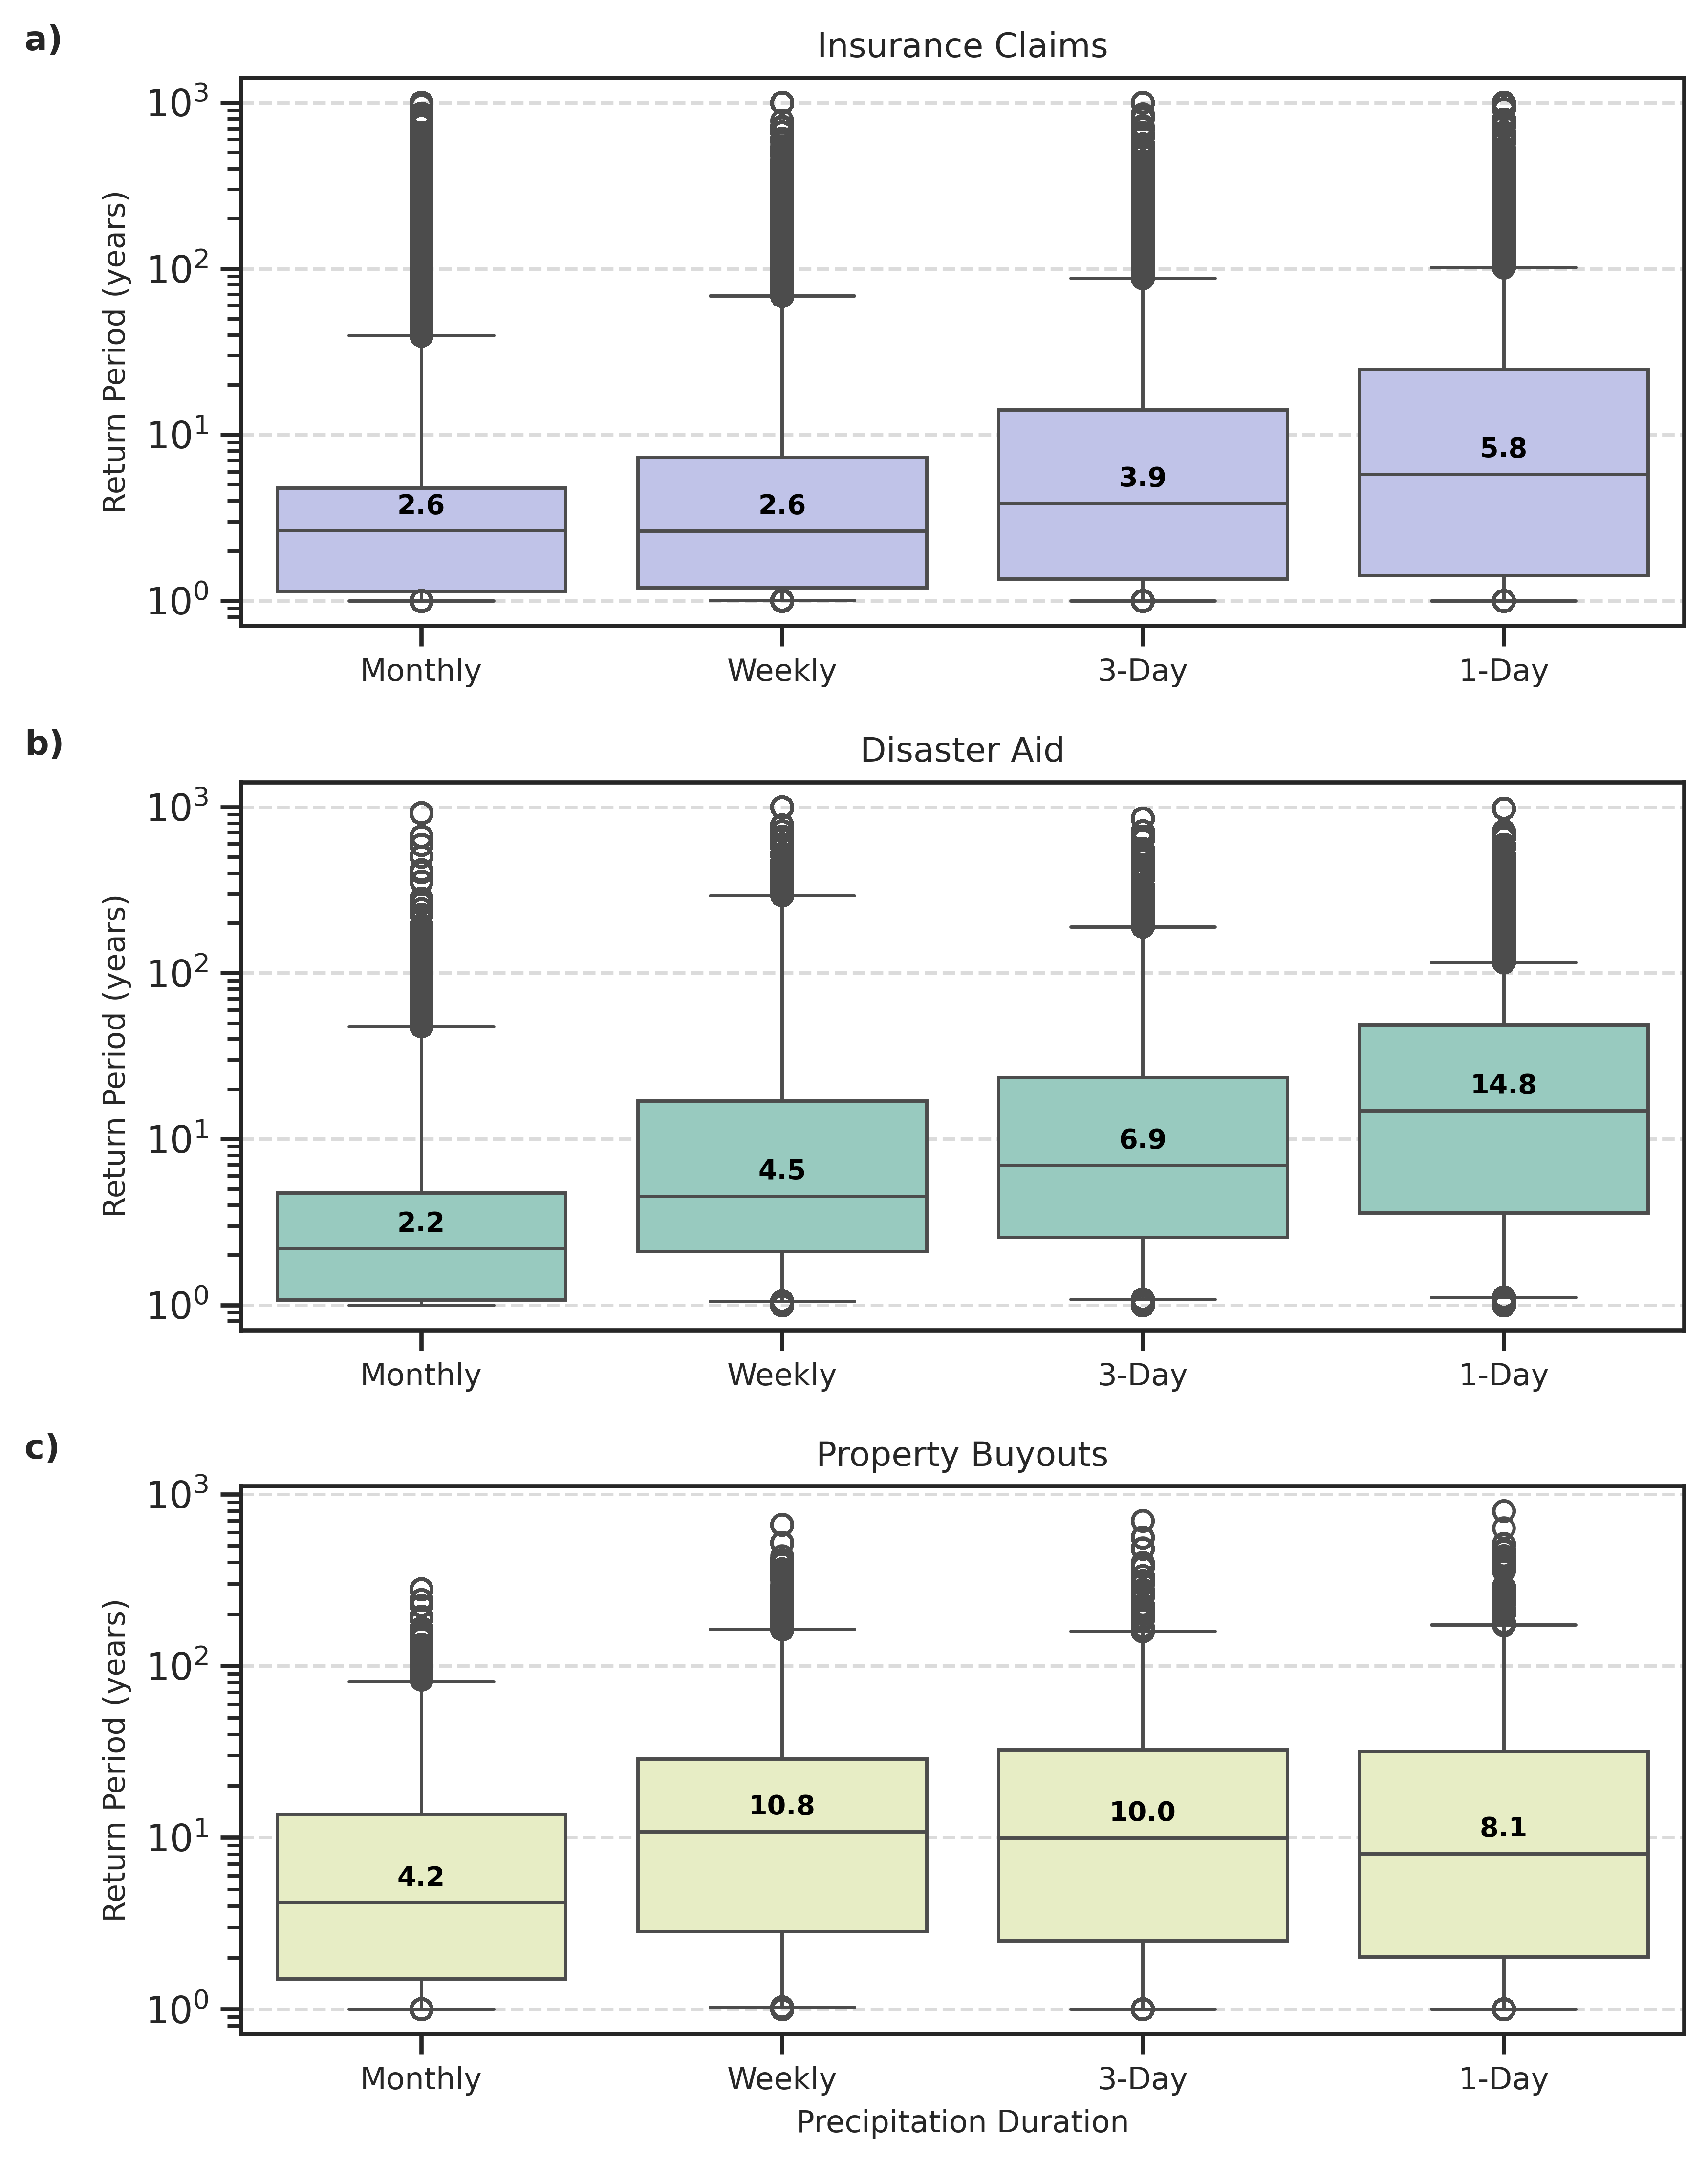

In [18]:
# Set figure size with a width constraint of 7.09 inches (~180mm)
fig_width = 7.09  # inches
fig_height = 9    # Adjust height for three rows
fig, axes = plt.subplots(3, 1, figsize=(fig_width, fig_height), dpi=500)

# Titles for the subplots
titles = ['Insurance Claims', 'Disaster Aid', 'Property Buyouts']

# Plotting the boxplots
sns.boxplot(data=data_msw, ax=axes[0], showfliers=True, color="#babeee", whis=[5, 95])
sns.boxplot(data=data_msw_aid, ax=axes[1], showfliers=True, color="#90d2c3", whis=[5, 95])
sns.boxplot(data=data_msw_buyouts, ax=axes[2], showfliers=True, color="#ecf4be", whis=[5, 95])

# Add median labels
label_medians(axes[0], data_msw)
label_medians(axes[1], data_msw_aid)
label_medians(axes[2], data_msw_buyouts)

# Set subplot titles
for i, ax in enumerate(axes):
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks(range(len(data_labels)))
    ax.set_xticklabels(data_labels, fontsize=9)
    ax.set_yscale("log")
    ax.set_ylabel('Return Period (years)', fontsize=9)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add a common xlabel for all plots
axes[2].set_xlabel('Precipitation Duration', fontsize=9)

# Add subplot labels
axes[0].text(-0.15, 1.05, 'a)', transform=axes[0].transAxes, size=10, weight='bold')
axes[1].text(-0.15, 1.05, 'b)', transform=axes[1].transAxes, size=10, weight='bold')
axes[2].text(-0.15, 1.05, 'c)', transform=axes[2].transAxes, size=10, weight='bold')

# Adjust layout and save the plot if needed
plt.tight_layout()
if save:
    plt.savefig('Plots/Fig_5_Boxplots.png', dpi=500)
plt.show()

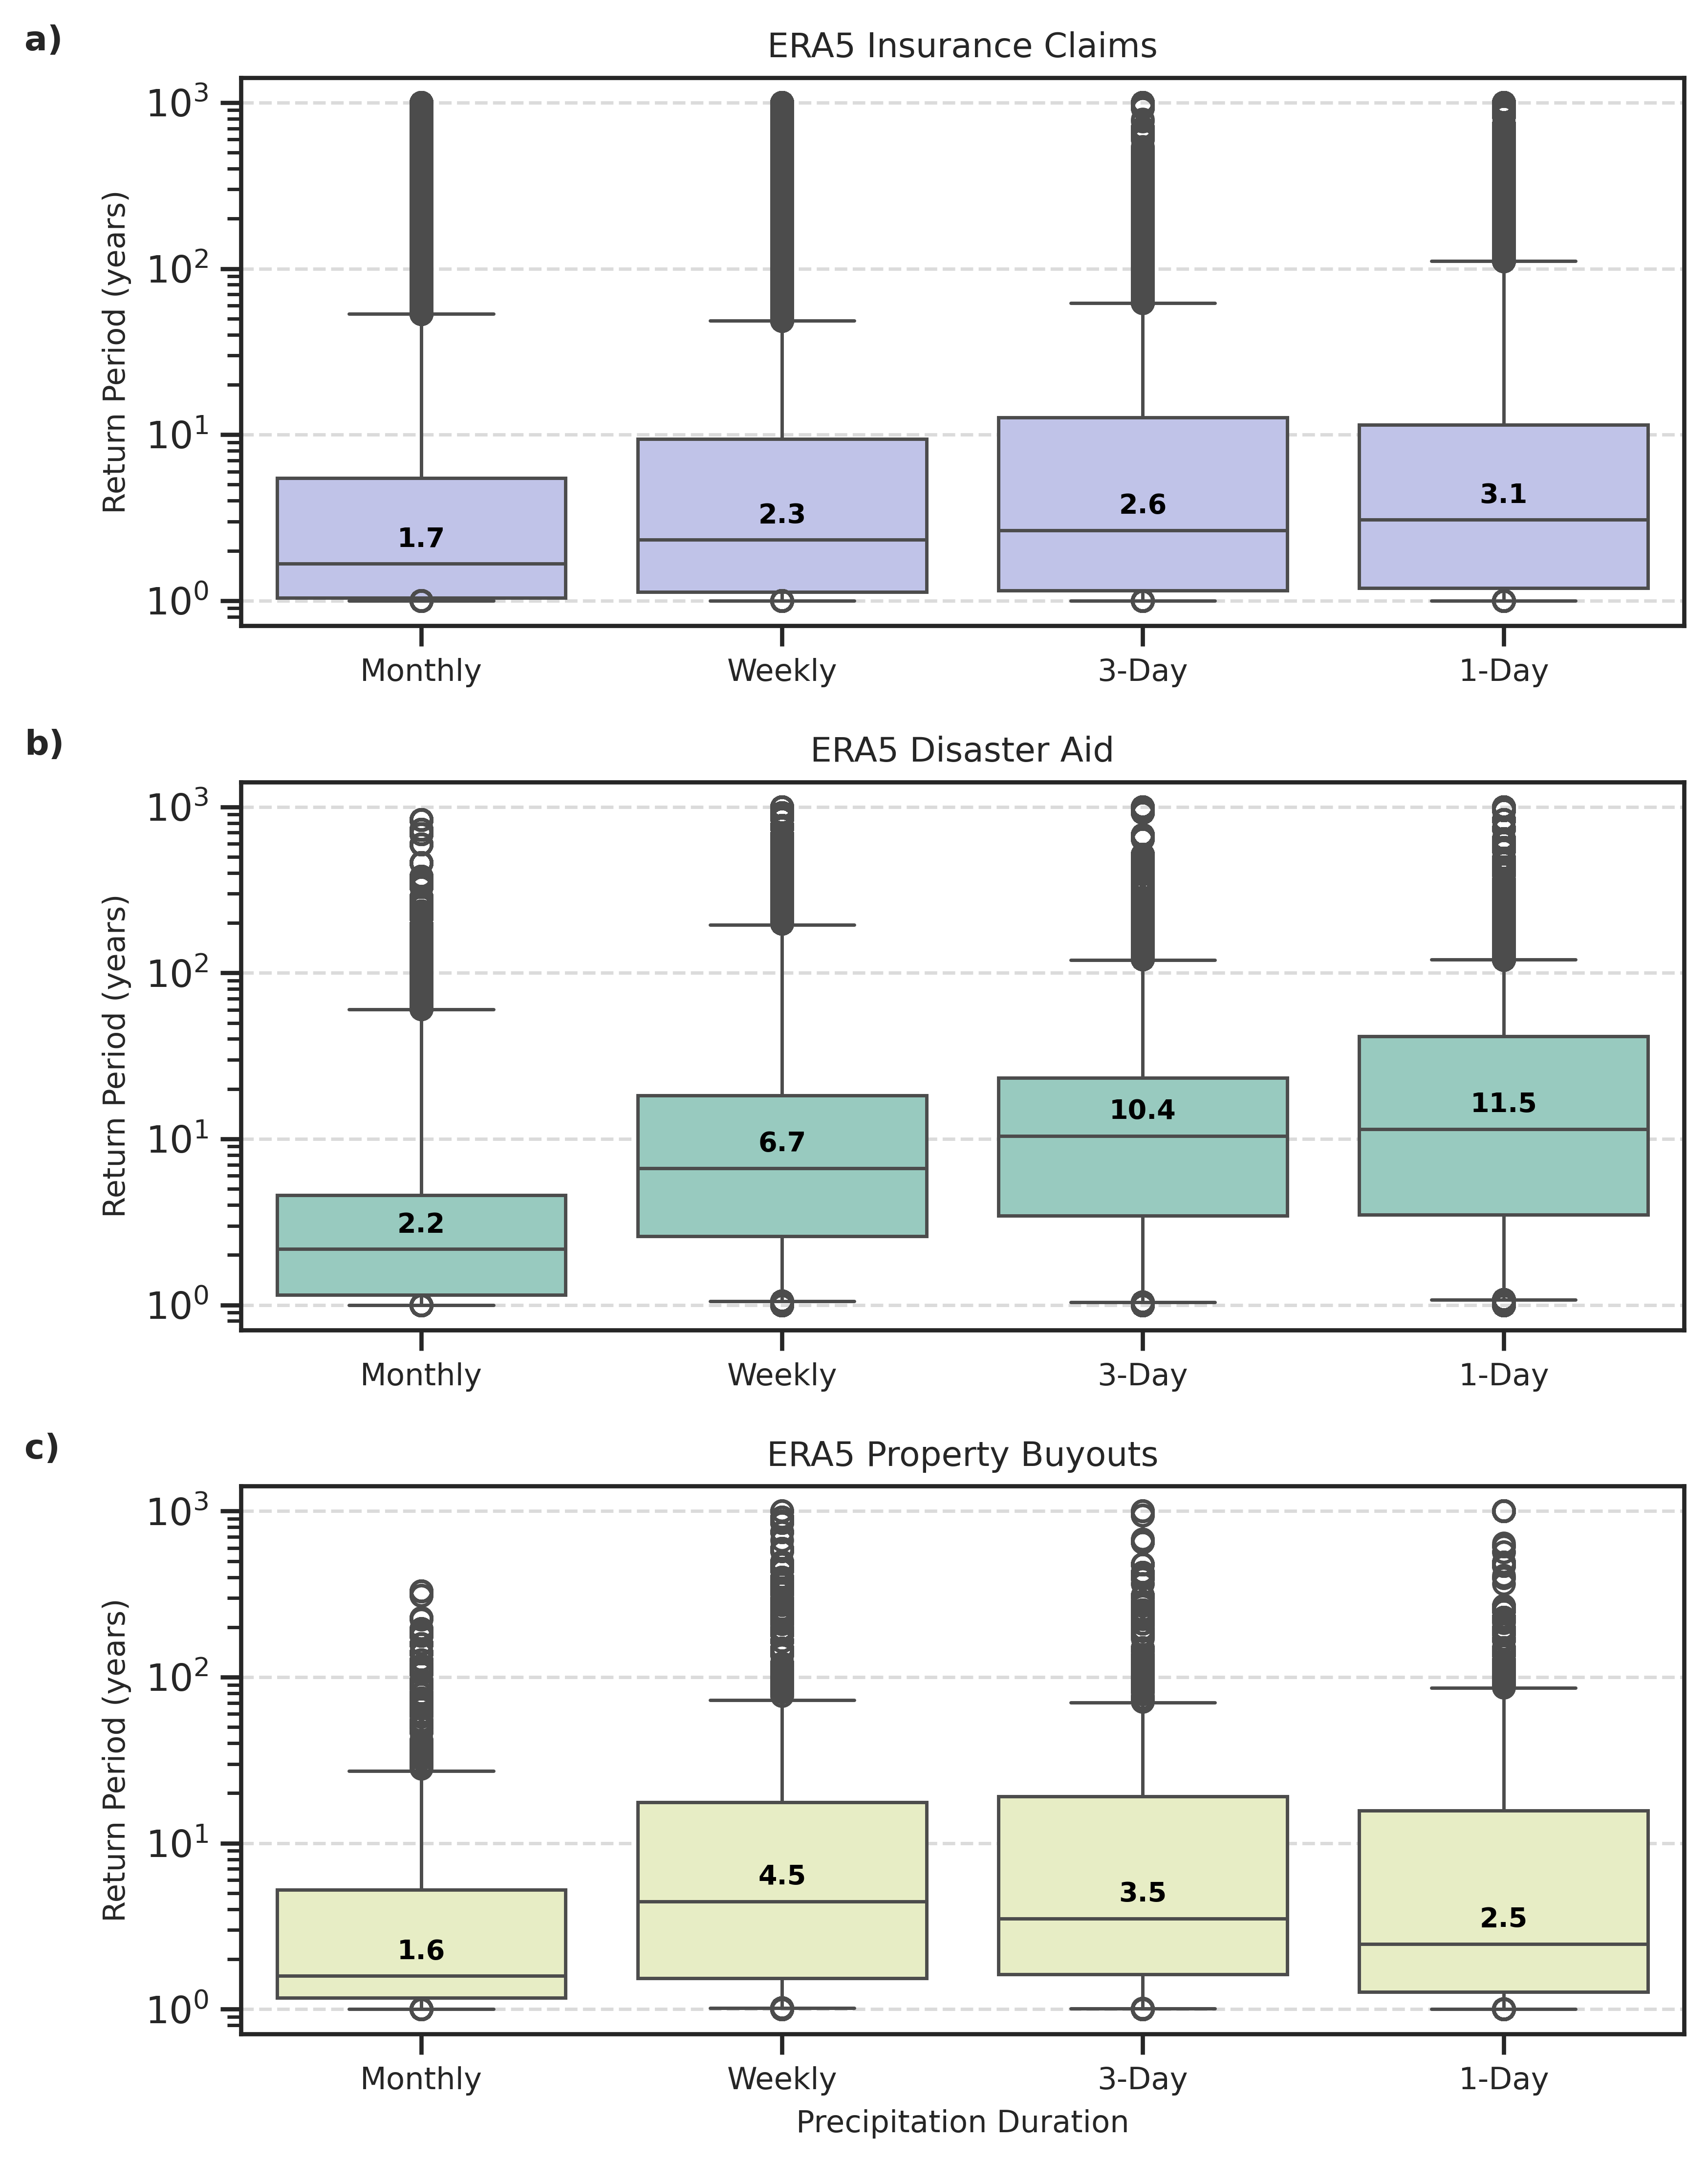

In [19]:
# Set figure size with a width constraint of 7.09 inches (~180mm)
fig_width = 7.09  # inches
fig_height = 9    # Adjust height for three rows
fig, axes = plt.subplots(3, 1, figsize=(fig_width, fig_height), dpi=500)

# Titles for the subplots
titles = ['ERA5 Insurance Claims', 'ERA5 Disaster Aid', 'ERA5 Property Buyouts']

# Plotting the boxplots
sns.boxplot(data=data_era, ax=axes[0], showfliers=True, color="#babeee", whis=[5, 95])
sns.boxplot(data=data_era_aid, ax=axes[1], showfliers=True, color="#90d2c3", whis=[5, 95])
sns.boxplot(data=data_era_buyouts, ax=axes[2], showfliers=True, color="#ecf4be", whis=[5, 95])

# Add median labels
label_medians(axes[0], data_era)
label_medians(axes[1], data_era_aid)
label_medians(axes[2], data_era_buyouts)

# Set subplot titles
for i, ax in enumerate(axes):
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks(range(len(data_labels)))
    ax.set_xticklabels(data_labels, fontsize=9)
    ax.set_yscale("log")
    ax.set_ylabel('Return Period (years)', fontsize=9)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add a common xlabel for all plots
axes[2].set_xlabel('Precipitation Duration', fontsize=9)

# Add subplot labels
axes[0].text(-0.15, 1.05, 'a)', transform=axes[0].transAxes, size=10, weight='bold')
axes[1].text(-0.15, 1.05, 'b)', transform=axes[1].transAxes, size=10, weight='bold')
axes[2].text(-0.15, 1.05, 'c)', transform=axes[2].transAxes, size=10, weight='bold')

# Adjust layout and save the plot if needed
plt.tight_layout()
if save:
    plt.savefig('Plots/Fig_5_Boxplots.png', dpi=500)
plt.show()